# **Healthcare Analytics**

## Introduction -
Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

![Healthcare Stats](Stats_picture.png)

## Objective: 

To accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

## Dataset Description

Independent Variables:

1. **case_id**:	Case_ID registered in Hospital

2. **Hospital_code**: Unique code for the Hospital

3. **Hospital_type_code**:	Unique code for the type of Hospital
4. **City_Code_Hospital**:	City Code of the Hospital
5. **Hospital_region_code**:	Region Code of the Hospital
6. **Available Extra Rooms in Hospital**:	Number of Extra rooms available in the Hospital
7. **Department**: Department overlooking the case
8. **Ward_Type**: Code for the Ward type
9. **Ward_Facility_Code**:	Code for the Ward Facility
10. **Bed Grade**:	Condition of Bed in the Ward
11.	**patientid**:	Unique Patient Id
12.	**City_Code_Patient**:	City Code for the patient
13. **Type of Admission**:	Admission Type registered by the Hospital
14.	**Severity of Illness**:	Severity of the illness recorded at the time o...
15.	**Visitors with Patient**:	Number of Visitors with the patient
16.	**Age**:	Age of the patient
17.	**Admission_Deposit**:	Deposit at the Admission Time

Dependent variable:
1.	**Stay**:	Stay Days by the patient (11 Classes ranging from 0-10, 11-20... 91-100, >100)


## Methodology

The Steps that we are going to follow to complete this implementation is as follows:

1. **Importing the necessary libraries**


2. **Data Loading**


3. **Exploratory Data Analysis**:
    1. Variable Transformation    
    2. Handling Missing Value
    3. Outlier detection
    4. Exploring /insights from the data

4. **Feature Engineering**:
    1. One hot Encoding (Status variable)
    2. Standardisation
    3. Feature selection
      
5. **Modeling** - Training - hyperparameter tuning, testing
      1. Logistics Regression
      2. Baseline Classification Tree
      3. Random forest
      4. Extreme Gradient boosting
    

6. **Results and Model Selection**

7.  **Model Deployment**

8. **Conclusion**



## 1. Importing Necessary Libraries

In [82]:
# Avoiding Warnings

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

**Import Dependencies**

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, roc_curve, classification_report
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling as pp

## 2. Data Loading

### 2.1 Train Data

In [84]:
# read the training dataset
df_los_train = pd.read_csv('train_data.csv')

# shape of the training data
print(df_los_train.shape)

# top 10 rows of the train data
df_los_train.head(10)

(318438, 18)


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [85]:
# For each column heading we replace " " and convert the heading in lowercase 

cleancolumn = []
for i in range(len(df_los_train.columns)):
    cleancolumn.append(df_los_train.columns[i].replace(' ', '_').lower())
df_los_train.columns = cleancolumn
df_los_train.columns

Index(['case_id', 'hospital_code', 'hospital_type_code', 'city_code_hospital',
       'hospital_region_code', 'available_extra_rooms_in_hospital',
       'department', 'ward_type', 'ward_facility_code', 'bed_grade',
       'patientid', 'city_code_patient', 'type_of_admission',
       'severity_of_illness', 'visitors_with_patient', 'age',
       'admission_deposit', 'stay'],
      dtype='object')

In [86]:
# check the null value and datatype of each column

df_los_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   hospital_code                      318438 non-null  int64  
 2   hospital_type_code                 318438 non-null  object 
 3   city_code_hospital                 318438 non-null  int64  
 4   hospital_region_code               318438 non-null  object 
 5   available_extra_rooms_in_hospital  318438 non-null  int64  
 6   department                         318438 non-null  object 
 7   ward_type                          318438 non-null  object 
 8   ward_facility_code                 318438 non-null  object 
 9   bed_grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  city_code_patient                  3139

### 2.1 Test Data

In [87]:
# read the test dataset
df_los_test = pd.read_csv('test_data.csv')

# check the shape of the test data
print(df_los_test.shape)

# check the first 10 rows of the test data
df_los_test.head(10)

(137057, 17)


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
5,318444,23,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,2,71-80,4659.0
6,318445,26,b,2,Y,2,gynecology,Q,D,2.0,17006,2.0,Trauma,Moderate,2,71-80,4167.0
7,318446,25,e,1,X,4,gynecology,S,E,3.0,95946,NaN,Emergency,Moderate,2,31-40,4396.0
8,318447,23,a,6,X,4,gynecology,Q,F,3.0,95946,NaN,Trauma,Moderate,2,31-40,4088.0
9,318448,23,a,6,X,3,gynecology,Q,F,4.0,95946,NaN,Urgent,Moderate,2,31-40,3925.0


In [88]:
# For each column heading we replace " " and convert the heading in lowercase 

cleancolumn = []
for i in range(len(df_los_test.columns)):
    cleancolumn.append(df_los_test.columns[i].replace(' ', '_').lower())
df_los_test.columns = cleancolumn
df_los_test.columns

Index(['case_id', 'hospital_code', 'hospital_type_code', 'city_code_hospital',
       'hospital_region_code', 'available_extra_rooms_in_hospital',
       'department', 'ward_type', 'ward_facility_code', 'bed_grade',
       'patientid', 'city_code_patient', 'type_of_admission',
       'severity_of_illness', 'visitors_with_patient', 'age',
       'admission_deposit'],
      dtype='object')

In [89]:
# check for the null values and datatype of each column

df_los_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   hospital_code                      137057 non-null  int64  
 2   hospital_type_code                 137057 non-null  object 
 3   city_code_hospital                 137057 non-null  int64  
 4   hospital_region_code               137057 non-null  object 
 5   available_extra_rooms_in_hospital  137057 non-null  int64  
 6   department                         137057 non-null  object 
 7   ward_type                          137057 non-null  object 
 8   ward_facility_code                 137057 non-null  object 
 9   bed_grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  city_code_patient                  1349

## 3. Exploratory Data Analysis 

Note: We will carry out exploratory data analysis on Train data only as that is going to be used for the model creation. But we will do the feature Engineering for both the datasets.

### 3.1. Variable Transformation

**Describing the data**

In [90]:
# describe the train data

df_los_train.describe()

,case_id,hospital_code,city_code_hospital,available_extra_rooms_in_hospital,bed_grade,patientid,city_code_patient,visitors_with_patient,admission_deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


After looking at the statistical summary, the range of certain variables are quite low so we check their unique values. 
Let's check the unique values in hospital_code, city_code_hospital, bed_grade, city_code_patient.

In [91]:
# creating a dataframe for unique values in both train andd test data

table_1_unique_values = pd.DataFrame({ "Train_unique_values" : df_los_train.nunique()[:],
              "Test_unique_values" : df_los_test.nunique()[:]})
table_1_unique_values

,Train_unique_values,Test_unique_values
admission_deposit,7300,6609.0
age,10,10.0
available_extra_rooms_in_hospital,18,15.0
bed_grade,4,4.0
case_id,318438,137057.0
city_code_hospital,11,11.0
city_code_patient,37,37.0
department,5,5.0
hospital_code,32,32.0
hospital_region_code,3,3.0


Looking at the statistical summary and detailed description of the columns, we find that:

1. hospital_code: Only 32 unique values exist. Should be converted to object type
2. city_code_hospital: Only 11 unique value exist. Should be converted to Object type
3. bed_grade: Only 4 unique value exist. Should be converted to Object type
4. city_code_patient: Only 37 unique values exist. Should be converted to object type 

In [92]:
# creating a function for necessary transformation of datatypes of some columns

def variables_transformation(df):
    variables_to_be_changed = ["hospital_code","city_code_hospital","bed_grade", "city_code_patient"]
    df[variables_to_be_changed]=df[variables_to_be_changed].astype(object)
    df.info()
    
#Train data
variables_transformation(df_los_train)

#Test data
variables_transformation(df_los_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   hospital_code                      318438 non-null  object 
 2   hospital_type_code                 318438 non-null  object 
 3   city_code_hospital                 318438 non-null  object 
 4   hospital_region_code               318438 non-null  object 
 5   available_extra_rooms_in_hospital  318438 non-null  int64  
 6   department                         318438 non-null  object 
 7   ward_type                          318438 non-null  object 
 8   ward_facility_code                 318438 non-null  object 
 9   bed_grade                          318325 non-null  object 
 10  patientid                          318438 non-null  int64  
 11  city_code_patient                  3139

In [93]:
#pp.ProfileReport(df_los_train)

In [94]:
# now recheck the datatypes of all the columns

df_los_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   hospital_code                      318438 non-null  object 
 2   hospital_type_code                 318438 non-null  object 
 3   city_code_hospital                 318438 non-null  object 
 4   hospital_region_code               318438 non-null  object 
 5   available_extra_rooms_in_hospital  318438 non-null  int64  
 6   department                         318438 non-null  object 
 7   ward_type                          318438 non-null  object 
 8   ward_facility_code                 318438 non-null  object 
 9   bed_grade                          318325 non-null  object 
 10  patientid                          318438 non-null  int64  
 11  city_code_patient                  3139

### 3.2. Handling missing values

In [95]:
# to check the number of null values in each column of train data

df_los_train.isnull().sum()

case_id                                 0
hospital_code                           0
hospital_type_code                      0
city_code_hospital                      0
hospital_region_code                    0
available_extra_rooms_in_hospital       0
department                              0
ward_type                               0
ward_facility_code                      0
bed_grade                             113
patientid                               0
city_code_patient                    4532
type_of_admission                       0
severity_of_illness                     0
visitors_with_patient                   0
age                                     0
admission_deposit                       0
stay                                    0
dtype: int64

In [96]:
# to check the number of null values in each column of test data

df_los_test.isnull().sum()

case_id                                 0
hospital_code                           0
hospital_type_code                      0
city_code_hospital                      0
hospital_region_code                    0
available_extra_rooms_in_hospital       0
department                              0
ward_type                               0
ward_facility_code                      0
bed_grade                              35
patientid                               0
city_code_patient                    2157
type_of_admission                       0
severity_of_illness                     0
visitors_with_patient                   0
age                                     0
admission_deposit                       0
dtype: int64

##### Bed grade

Since there are only 113 and 35 values missing from bed_grade in train and test, we can impute the grade with highest number of number observation.

In [97]:
# total count of bed grade quality from 1.0 to 4.0

initial_count_bed_grade = df_los_train["bed_grade"].value_counts()
initial_count_bed_grade

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: bed_grade, dtype: int64

In [98]:
# Checking the Percentage of rows that has been classified a certain grade

for i in range(1,5) :
    print("Percentage of rows that has been classified grade {} is {} % ".format(i, round((df_los_train["bed_grade"].value_counts()[i]/len(df_los_train))*100,2)))



Percentage of rows that has been classified grade 1 is 8.32 % 
Percentage of rows that has been classified grade 2 is 38.84 % 
Percentage of rows that has been classified grade 3 is 34.73 % 
Percentage of rows that has been classified grade 4 is 18.08 % 


In [99]:
# imputing bed grade with 2.0
df_los_train["bed_grade"].fillna(df_los_train["bed_grade"].mode()[0], inplace=True)

#checking whether we imputed the right grade
print(initial_count_bed_grade[2] - df_los_train["bed_grade"].value_counts()[2])

#checking the null values in bed grade
df_los_train["bed_grade"].isnull().sum()

-113


0

##### City code patient

In [100]:
# check for the frequency for city_code_patient for 37 codes

df_los_train["city_code_patient"].value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: city_code_patient, dtype: int64

By looking the numbers in each classes, we will impute the missing values City_code_patient column with its mode again.

##### Imputation

In [101]:
# creating a function of imputation, filling missing values with mode

def missing_value_imputation(df):
    df["bed_grade"].fillna(df["bed_grade"].mode()[0], inplace=True)
    df["city_code_patient"].fillna(df["city_code_patient"].mode()[0], inplace=True)

In [102]:
#train data imputaion
missing_value_imputation(df_los_train)

#checking the null values in bed grade
df_los_train[["bed_grade","city_code_patient"]].isnull().sum()


bed_grade            0
city_code_patient    0
dtype: int64

In [103]:
#test data imputaion
missing_value_imputation(df_los_test)

#checking the null values in bed grade
df_los_test[["bed_grade","city_code_patient"]].isnull().sum()


bed_grade            0
city_code_patient    0
dtype: int64

### 3.3. Outlier Detection

Methodology
1. For Numerical Variables: We will plot boxplots to detect variables
2. For categoriacl variables: Check the number of unique values in each category of a variable to detect outliers

concatenating the train and test to evaluate outliers and perform Feature engineering in latter Stages

In [104]:
#Labelling the train and test datasets by creating columns which will be used when we split them further
df_los_train['train_or_test']='train'
df_los_test['train_or_test']='test'

df_los_concat=pd.concat([df_los_train,df_los_test])
df_los_concat

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay,train_or_test
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test


In [105]:
# seperating the numerical columns and categorical columns and storing them under new variable names

numerical_columns = ["case_id", "patientid","city_code_patient", "available_extra_rooms_in_hospital", "visitors_with_patient", "admission_deposit"]

categorical_columns = ["hospital_code", "hospital_type_code", "city_code_hospital", "hospital_region_code", "department", "bed_grade", "ward_type", "ward_facility_code", "type_of_admission", "severity_of_illness", "age", "stay"]

df_los_num = df_los_concat[numerical_columns]
df_los_cat= df_los_concat[categorical_columns]
print(df_los_cat.shape)
df_los_cat.head()


(455495, 12)


,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,department,bed_grade,ward_type,ward_facility_code,type_of_admission,severity_of_illness,age,stay
0,8,c,3,Z,radiotherapy,2.0,R,F,Emergency,Extreme,51-60,0-10
1,2,c,5,Z,radiotherapy,2.0,S,F,Trauma,Extreme,51-60,41-50
2,10,e,1,X,anesthesia,2.0,S,E,Trauma,Extreme,51-60,31-40
3,26,b,2,Y,radiotherapy,2.0,R,D,Trauma,Extreme,51-60,41-50
4,26,b,2,Y,radiotherapy,2.0,S,D,Trauma,Extreme,51-60,41-50


##### Numerical Variables

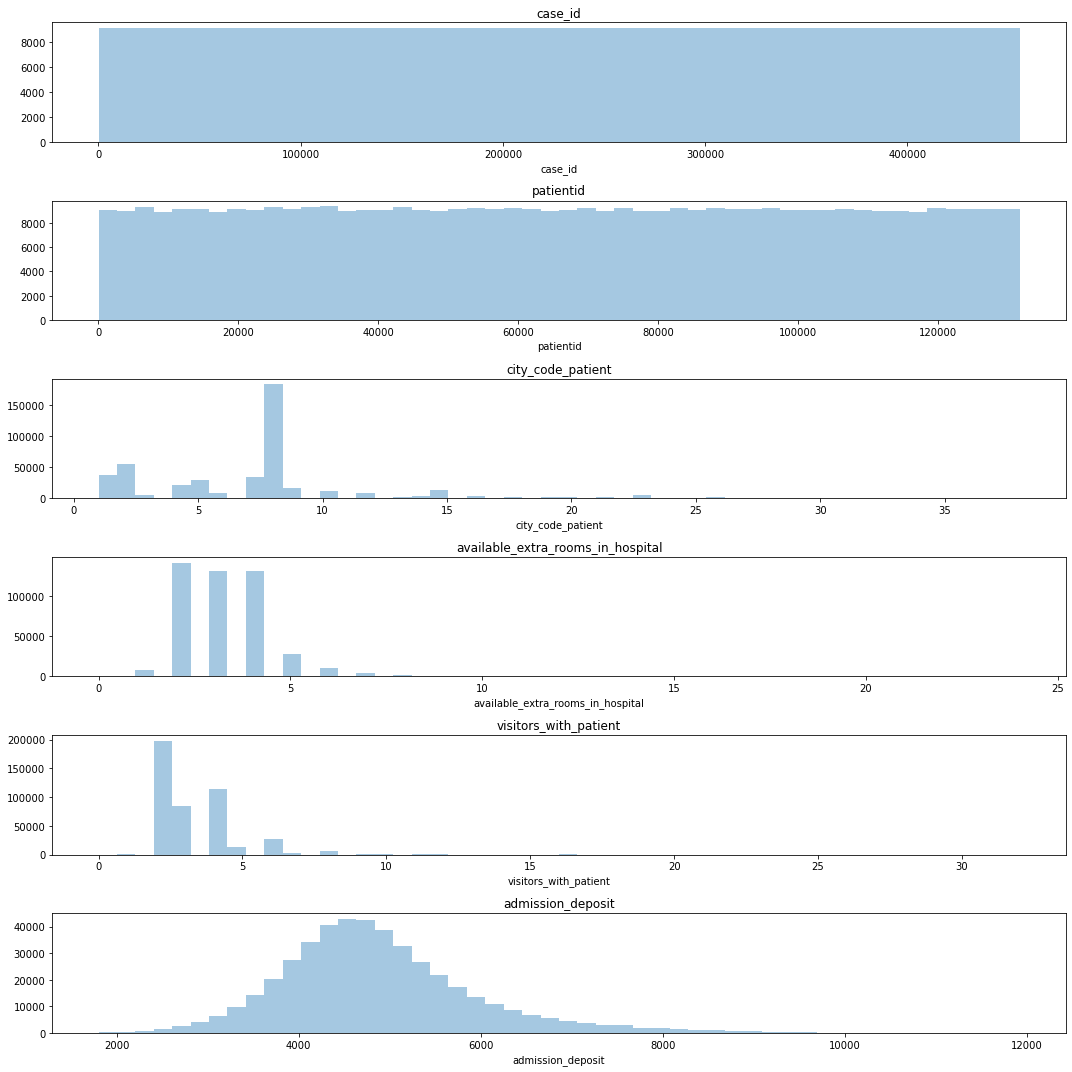

In [106]:
# create a fucntion to check the distribution of numerical data, i.e using histogram

def histplots(df):
    fig, axes = plt.subplots(len(list(df.columns)), 1, figsize=(15,15))
    count = 0
    for i, col in enumerate(df.columns):
        sns.distplot(df[col], ax=axes[i], hist=True,kde=False)
        axes[i].set_title(col)
        count+=1
    plt.tight_layout()
    

histplots(df_los_num)

From the above plots we can infer that there are outliners present for : 
city_code_patient, 
avaliable_extra_rooms_in_hospital, 
vistors_with patients 
aadmission_dpeosits
Hence we check for boxplots for these variables in order to remove these outliners.

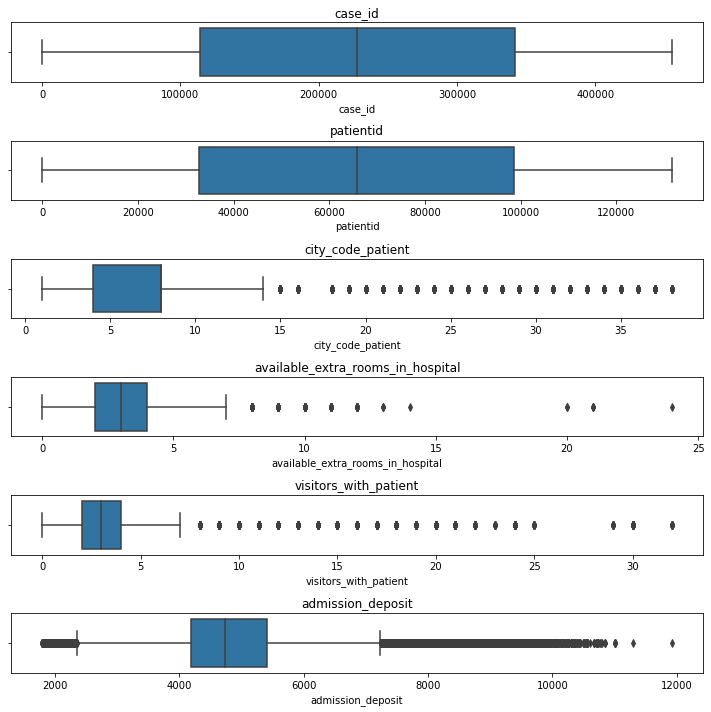

In [107]:
# create a function for chekcing the outliners using boxplots


def boxplots(df):
    fig, axes = plt.subplots(len(list(df.columns)), 1, figsize=(10,10))
    count = 0
    for i, col in enumerate(df.columns):
        sns.boxplot(df[col], ax=axes[i])
        axes[i].set_title(col)
        count+=1
    plt.tight_layout()


boxplots(df_los_num)

###### Available_extra_rooms_in hospital

After looking at the Box plot of the variable, we will check the number of observations containing 8 and 18 available extra room.

In [108]:
df_los_concat[(df_los_concat["available_extra_rooms_in_hospital"] < 18)& (df_los_concat["available_extra_rooms_in_hospital"] >= 8)]

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay,train_or_test
110,111,9,d,5,Z,8,gynecology,Q,F,2.0,110115,8.0,Emergency,Moderate,4,71-80,3035.0,21-30,train
317,318,26,b,2,Y,9,gynecology,P,D,1.0,115145,5.0,Emergency,Extreme,4,51-60,3623.0,41-50,train
413,414,26,b,2,Y,8,radiotherapy,P,D,3.0,3372,2.0,Emergency,Extreme,6,21-30,4584.0,21-30,train
593,594,6,a,6,X,8,gynecology,Q,F,2.0,83674,8.0,Trauma,Extreme,4,41-50,3716.0,21-30,train
1006,1007,26,b,2,Y,10,radiotherapy,P,D,2.0,80113,4.0,Trauma,Moderate,4,41-50,4216.0,21-30,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136449,454888,14,a,1,X,8,gynecology,P,E,2.0,59091,7.0,Trauma,Moderate,5,31-40,3879.0,NaN,test
136540,454979,11,b,2,Y,9,gynecology,Q,D,3.0,7815,5.0,Trauma,Minor,4,31-40,4546.0,NaN,test
136541,454980,11,b,2,Y,8,anesthesia,Q,D,3.0,109465,8.0,Trauma,Minor,4,21-30,6773.0,NaN,test
136791,455230,23,a,6,X,8,gynecology,Q,F,1.0,8229,2.0,Urgent,Moderate,2,21-30,3555.0,NaN,test


In [109]:
df_los_concat[(df_los_concat["available_extra_rooms_in_hospital"] >= 18)]

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay,train_or_test
55607,55608,26,b,2,Y,20,radiotherapy,R,D,4.0,89582,8.0,Trauma,Moderate,16,61-70,2462.0,51-60,train
153984,153985,26,b,2,Y,21,radiotherapy,R,D,4.0,25495,8.0,Trauma,Moderate,15,41-50,3192.0,41-50,train
153985,153986,26,b,2,Y,21,radiotherapy,R,D,4.0,25495,8.0,Trauma,Moderate,15,41-50,4404.0,41-50,train
260194,260195,26,b,2,Y,20,gynecology,R,D,4.0,16757,8.0,Trauma,Extreme,2,41-50,2350.0,More than 100 Days,train
260195,260196,26,b,2,Y,21,gynecology,R,D,4.0,16757,8.0,Trauma,Extreme,2,41-50,7199.0,More than 100 Days,train
278631,278632,27,a,7,Y,24,radiotherapy,S,C,3.0,11053,5.0,Emergency,Moderate,2,71-80,4052.0,0-10,train
29367,347806,26,b,2,Y,21,radiotherapy,R,D,4.0,107843,8.0,Trauma,Moderate,12,41-50,3553.0,NaN,test


Since, there are only 7 observations with hospitals more than 18 rooms. Hence, this must be an outlier and we will drop these observations.

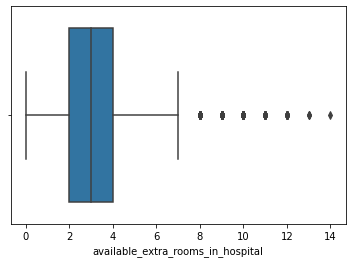

In [110]:
# dropping the outliners with hospitals more then 18

df_los_concat = df_los_concat.drop(df_los_concat[(df_los_concat["available_extra_rooms_in_hospital"] >= 18)].index.values)
sns.boxplot(df_los_concat["available_extra_rooms_in_hospital"])

In [111]:
# check the shape

df_los_concat.shape

(455486, 19)

###### Visitors 

In covid times visitors coming to the hospital would be minimum and anything above 7 visitors doesn't make sense

In [112]:
# # remove the outliners lying within 0.25 and 0.75 

# Q1 = df_los_concat["visitors_with_patient"].quantile(0.25)
# Q3 = df_los_concat["visitors_with_patient"].quantile(0.75)
# IQR = Q3-Q1
# df_los_concat = df_los_concat.drop(df_los_concat[(df_los_concat["visitors_with_patient"] >= (Q3+(1.5*IQR))) | (df_los_concat["visitors_with_patient"] <= (Q1-(1.5*IQR)))].index.values)
# sns.boxplot(df_los_concat["visitors_with_patient"])

In [113]:
df_los_concat[(df_los_concat["visitors_with_patient"] > 25)].count()

case_id                              48
hospital_code                        48
hospital_type_code                   48
city_code_hospital                   48
hospital_region_code                 48
available_extra_rooms_in_hospital    48
department                           48
ward_type                            48
ward_facility_code                   48
bed_grade                            48
patientid                            48
city_code_patient                    48
type_of_admission                    48
severity_of_illness                  48
visitors_with_patient                48
age                                  48
admission_deposit                    48
stay                                 18
train_or_test                        48
dtype: int64

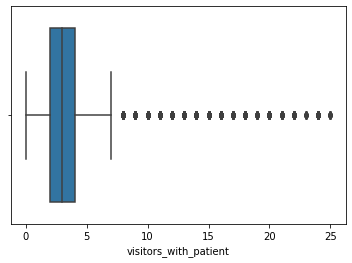

In [114]:
df_los_concat = df_los_concat.drop(df_los_concat[(df_los_concat["visitors_with_patient"] > 25)].index.values)
sns.boxplot(df_los_concat["visitors_with_patient"])

###### Admission Deposit

Checking the observations with hospitals having admission deposit to be more than 11000

In [115]:
df_los_concat[(df_los_concat["admission_deposit"] > 11000)]["admission_deposit"]

144227    11008.0
234331    11008.0
287085    11008.0
296591    11008.0
33736     11920.0
58137     11293.0
Name: admission_deposit, dtype: float64

In [116]:
df_los_concat.shape

(455398, 19)

### 3.4 Exploring/insights from the data

We will explore different categorical variables one by one out here

In [117]:
df_los_cat.head()

,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,department,bed_grade,ward_type,ward_facility_code,type_of_admission,severity_of_illness,age,stay
0,8,c,3,Z,radiotherapy,2.0,R,F,Emergency,Extreme,51-60,0-10
1,2,c,5,Z,radiotherapy,2.0,S,F,Trauma,Extreme,51-60,41-50
2,10,e,1,X,anesthesia,2.0,S,E,Trauma,Extreme,51-60,31-40
3,26,b,2,Y,radiotherapy,2.0,R,D,Trauma,Extreme,51-60,41-50
4,26,b,2,Y,radiotherapy,2.0,S,D,Trauma,Extreme,51-60,41-50


#### hospital_region_code

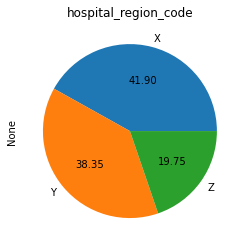

In [118]:
# pie chart for hospital_region_code
df_los_concat.groupby('hospital_region_code').size().plot(kind='pie', autopct='%.2f', title = "hospital_region_code") 

It can be inferred from above count plot that there are more hospital_region_code 'X' and less hospital_region_code 'Z'

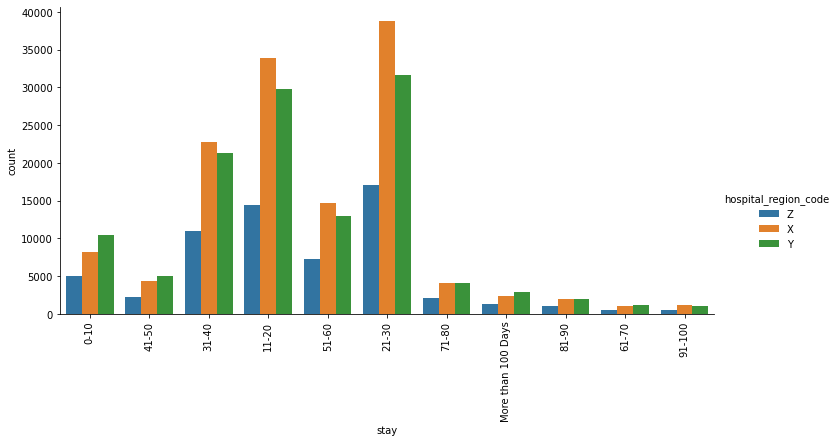

In [119]:
# hospital_region_code relationship with target - stay

sns.catplot(x='stay', hue="hospital_region_code", kind="count",data=df_los_concat, height = 5,aspect = 2)

plt.xticks(rotation=90);

From the above plot we conclude the stay of patients is highest in the three regions X,Y,Z for a duration of 21-30 days.

**Hospital region & Ward facility code**

In [120]:
# check the size of hospital_region_code w.r.t ward_facilty_code

df_los_concat.groupby(['hospital_region_code','ward_facility_code']).size()

hospital_region_code  ward_facility_code
X                     E                      79052
                      F                     111764
Y                     B                      50103
                      C                      50269
                      D                      74281
Z                     A                      40256
                      F                      49673
dtype: int64

Creating a feature for Hospital_region_&_Ward_Facility_Code because particular ward_facility_code corresponds to particular Hospital_region_code

In [121]:
df_los_concat["hospital_region_&_ward_facility_code"] = df_los_concat['hospital_region_code']+'&'+df_los_concat['ward_facility_code']

In [122]:
# check the new column created

df_los_concat["hospital_region_&_ward_facility_code"]

0         Z&F
1         Z&F
2         X&E
3         Y&D
4         Y&D
         ... 
137052    Y&D
137053    X&E
137054    Z&A
137055    X&E
137056    X&F
Name: hospital_region_&_ward_facility_code, Length: 455398, dtype: object

**Hospital_region_code & City_code_hospital**

In [123]:
# check the size of hospital_region_code w.r.t city_code_hospital

df_los_concat.groupby(['hospital_region_code','city_code_hospital']).size()

hospital_region_code  city_code_hospital
X                     1                     79052
                      4                     19777
                      6                     67419
                      11                    24568
Y                     2                     74281
                      7                     50269
                      9                     37424
                      10                     7459
                      13                     5220
Z                     3                     45540
                      5                     44389
dtype: int64

Creating a feature for Hospital_region_&_city_code_hospital because particularcity_code_hospital corresponds to particular Hospital_region_code

In [124]:
df_los_concat['city_code_hospital']= df_los_concat['city_code_hospital'].apply(lambda x: str(x))
df_los_concat['hospital_region_&_city_code_hospital']= df_los_concat['hospital_region_code']+'&'+df_los_concat['city_code_hospital']
df_los_concat['city_code_hospital']= df_los_concat['city_code_hospital'].apply(lambda x: int(x))
df_los_concat['hospital_region_&_city_code_hospital']

0         Z&3
1         Z&5
2         X&1
3         Y&2
4         Y&2
         ... 
137052    Y&2
137053    X&1
137054    Z&3
137055    X&1
137056    X&6
Name: hospital_region_&_city_code_hospital, Length: 455398, dtype: object

**Continued in Feature engineering:**

Dropping Hospital_Region_code and ward_facility_code

#### ward_type

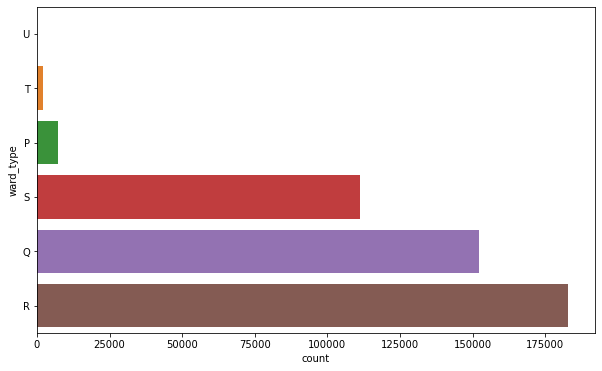

In [125]:
# frequency distribution plot for ward_type

order = df_los_concat['ward_type'].value_counts(ascending=True).index

plt.subplots(figsize=(10, 6))

sns.countplot(y="ward_type", data=df_los_concat , order=order)

plt.show()

From the above plot we can infer that the count of ward type R is the highest and least in case of ward_type U

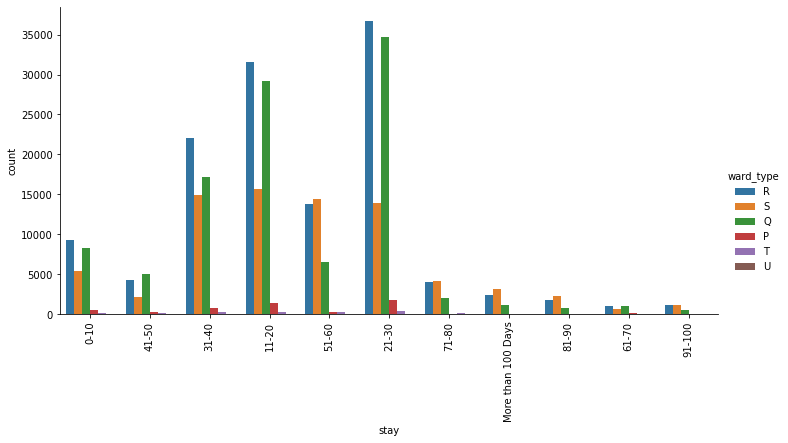

In [126]:
# ward_type relationship with target - stay
sns.catplot(x='stay', hue="ward_type", kind="count",data=df_los_concat, height = 5,aspect = 2)

plt.xticks(rotation=90);

From the above plot we can infer the relation between stay and ward_type, people tend to spend maximum time in ward_type R with an average of 21-30 days.

([<matplotlib.axis.YTick at 0x10745550>,
 [Text(0, 0.5, 'P'),
  Text(0, 1.5, 'Q'),
  Text(0, 2.5, 'R'),
  Text(0, 3.5, 'S'),
  Text(0, 4.5, 'T'),
  Text(0, 5.5, 'U')])

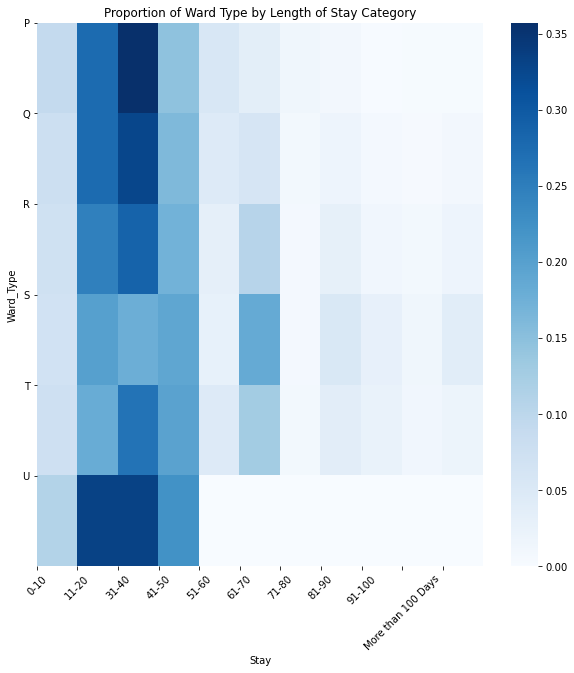

In [127]:
# create a heatmap of stay w.r.t ward_type to check the correlation

%matplotlib inline
c = df_los_concat.groupby(["ward_type", "stay"]).size()
c = (c/c.groupby(level=0).sum()).reset_index()

extra_rows = pd.DataFrame([["U","41-50", "0.000000"], ["U","51-60", "0.000000"], ["U","61-70", "0.000000"], ["U","71-80", "0.000000"], ["U","81-90", "0.000000"], ["U","91-100", "0.000000"], ["U","More than 100 Days", "0.000000"]], columns=["ward_type","stay",0])
c_new=pd.concat([c, extra_rows])
    
c = c_new.values[:,2].reshape(c.ward_type.unique().size, c.stay.unique().size).astype(float)

plt.figure(figsize=(10,10))
sns.heatmap(c, cmap = "Blues")

stay_order = ['0-10', '11-20', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','91-100', 'More than 100 Days']
ward_type_order = c_new.ward_type.unique()
plt.title("Proportion of Ward Type by Length of Stay Category")
plt.ylabel("Ward_Type")
plt.xlabel("Stay")
plt.xticks(np.arange(0,11), stay_order, rotation = 45)
plt.yticks(np.arange(0,6), ward_type_order, rotation = 0)


By looking at the above two Graph, we can conclude that 
1. Wards has short LOS while P,Q,R,S has longer LOS.
2. The stay of patients is highest in all the 5 wards for a duration of 21-30 days.

**continued in Feature engineering**
Hence, we can concatenate ward types into the following super categories:

1. PQRU
2. ST 

#### type_of_admission

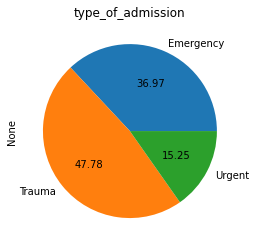

In [128]:
# pie chart for type_of_admission

df_los_concat.groupby('type_of_admission').size().plot(kind='pie', autopct='%.2f', title = "type_of_admission") 

It can be inferred from above count plot that there are more type of Admission is 'Trauma' and less type of Admission is 'Urgent'

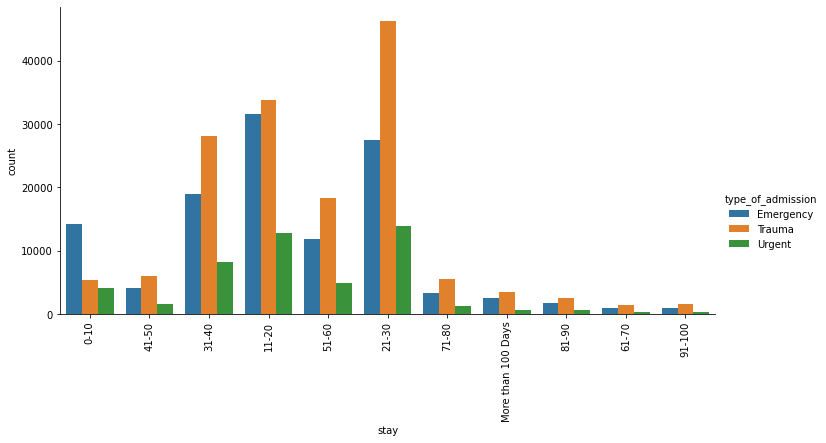

In [129]:
# type_of_admission relationship with target - stay

sns.catplot(x='stay', hue="type_of_admission", kind="count",data=df_los_concat, height = 5,aspect = 2)

plt.xticks(rotation=90);

From the above plot we conclude the stay of patients is highest due to the type of admission for the state of trauma for a duration of 21-30 days.

([<matplotlib.axis.XTick at 0x112f99e8>,
 [Text(0, 0, '0-10'),
  Text(0, 0, '11-20'),
  Text(0, 0, '31-40'),
  Text(0, 0, '41-50'),
  Text(0, 0, '51-60'),
  Text(0, 0, '61-70'),
  Text(0, 0, '71-80'),
  Text(0, 0, '81-90'),
  Text(0, 0, '91-100'),
  Text(0, 0, 'More than 100 Days')])

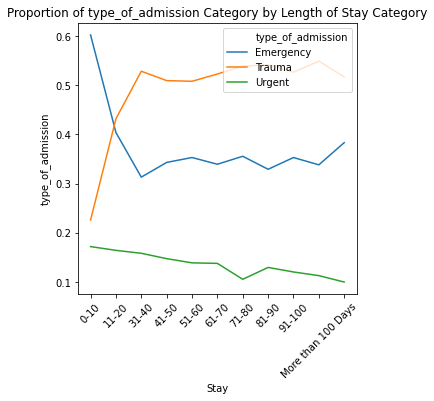

In [130]:
# create a line of stay w.r.t type_of_admission 

%matplotlib inline
c = df_los_concat.groupby(["type_of_admission", "stay"]).size()
c = (c/c.groupby(level=1).sum()).reset_index()
type_of_admission_order = c.type_of_admission.unique() 

plt.figure(figsize=(5,5))
sns.lineplot(x = "stay", y = 0, hue = "type_of_admission", data = c)

stay_order = ['0-10', '11-20', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','91-100', 'More than 100 Days']

plt.title("Proportion of type_of_admission Category by Length of Stay Category")
plt.ylabel("type_of_admission")
plt.xlabel("Stay")
plt.xticks(np.arange(0,11), stay_order, rotation = 45)

We see that the proportion of urgent admissions decreasing over the LOS, which could also be potentially useful in the model

#### age

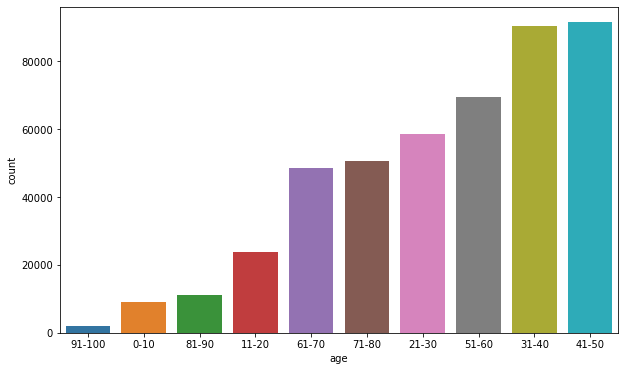

In [131]:
# frequency distribution plot for age

order = df_los_concat['age'].value_counts(ascending=True).index

plt.subplots(figsize=(10, 6))

sns.countplot(x="age", data=df_los_concat, order = order)

plt.show()

It can be inferred from above count plot that there are more Age group '41-51' and less Age group '91-100'

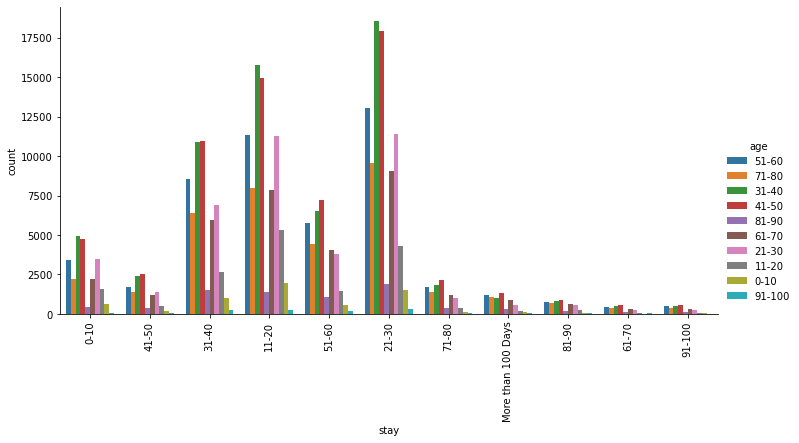

In [132]:
# age relationship with target - stay

sns.catplot(x='stay', hue="age", kind="count",data=df_los_concat, height = 5,aspect = 2)

plt.xticks(rotation=90);

From the above plot we conclude that age is a major factor affecting the stay of patients, specifically age group og 31-50 years old patients are admitted for an average duration of 21-30 days.

([<matplotlib.axis.YTick at 0x119706a0>,
 [Text(0, 0.5, '0-10'),
  Text(0, 1.5, '11-20'),
  Text(0, 2.5, '21-30'),
  Text(0, 3.5, '31-40'),
  Text(0, 4.5, '41-50'),
  Text(0, 5.5, '51-60'),
  Text(0, 6.5, '61-70'),
  Text(0, 7.5, '71-80'),
  Text(0, 8.5, '81-90'),
  Text(0, 9.5, '91-100')])

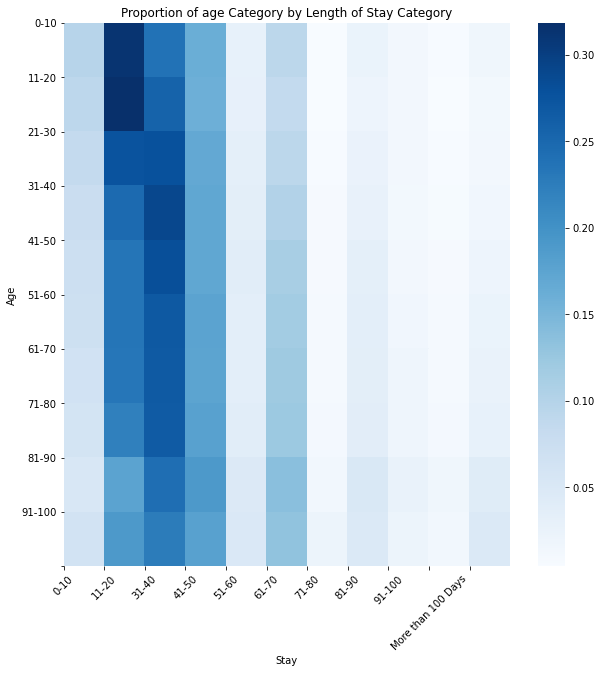

In [133]:
# create a heatmap of stay w.r.t age to check the correlation

%matplotlib inline
c = df_los_concat.groupby(["age", "stay"]).size()
c = (c/c.groupby(level=0).sum()).reset_index()
age_order = c.age.unique() 
c = c.values[:,-1].reshape(c.age.unique().size, c.stay.unique().size).astype(float)

plt.figure(figsize=(10,10))
sns.heatmap(c, cmap = "Blues")

stay_order = ['0-10', '11-20', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','91-100', 'More than 100 Days']

plt.title("Proportion of age Category by Length of Stay Category")
plt.ylabel("Age")
plt.xlabel("Stay")
plt.xticks(np.arange(0,11), stay_order, rotation = 45)
plt.yticks(np.arange(0,11), age_order, rotation = 0)

we do see that older patients tend to skew toward longer LOS than younger patients.

#### bed_grade

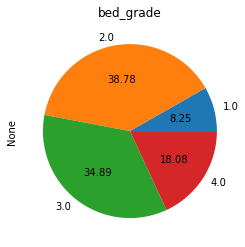

In [134]:
# pie chart for bed_grade

df_los_concat.groupby('bed_grade').size().plot(kind='pie', autopct='%.2f', title = "bed_grade") 

It can be inferred from above count plot that there are more bed grade '2' and less bed grade '1'

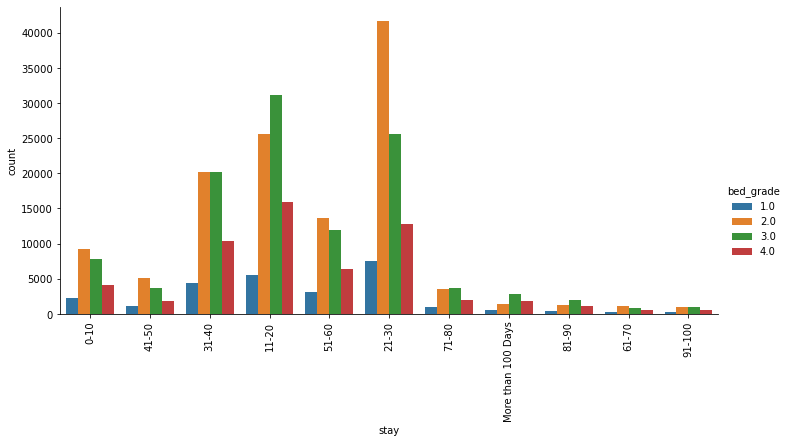

In [135]:
# bed_grade relationship with target - stay

sns.catplot(x='stay', hue="bed_grade", kind="count",data=df_los_concat, height = 5,aspect = 2)

plt.xticks(rotation=90);

From the above plot we conclude that the type of bed grade i.e condition of Bed in the ward affects the stay of patients, highest bed grade quality of 2.0 for an average stay of 21-30 days.

#### Department 

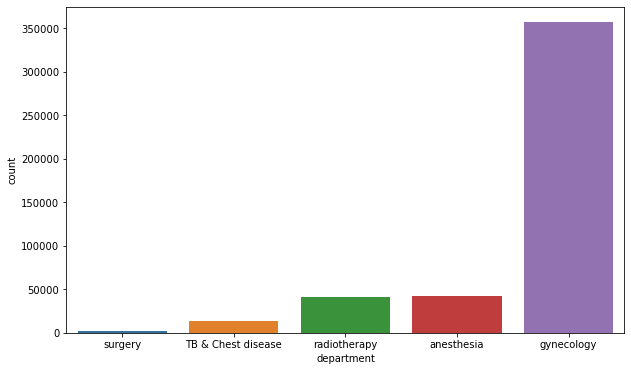

In [136]:
# frequency distribution plot for department

order = df_los_concat["department"].value_counts(ascending=True).index

plt.subplots(figsize=(10, 6))

sns.countplot(x="department", data=df_los_concat , order=order)

plt.show()

Here, we check which departments have the highest number of patients.

From the above bar plot, we see that majority of the patients register themselves at the gynecology department. 

Surgery department has the least number of cases. 

We can say that this is due to the fact that daily birth cases are far higher than daily surgeries.

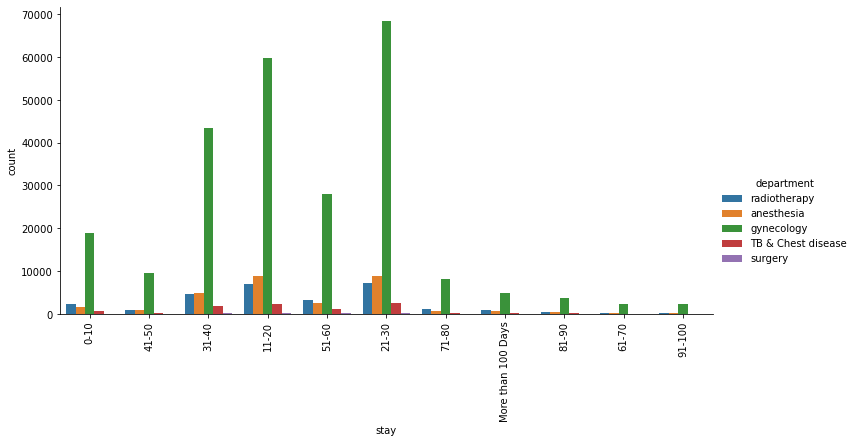

In [137]:
#Department relationship with target - stay

sns.catplot(x='stay', hue="department", kind="count",data=df_los_concat, height = 5,aspect = 2)

plt.xticks(rotation=90);

As evident form the plot above, we can say that the highest stay of patients is in the gynecology department with an average stay of 21-30 days.

([<matplotlib.axis.YTick at 0x10242808>,
 [Text(0, 0.5, 'TB & Chest disease'),
  Text(0, 1.5, 'anesthesia'),
  Text(0, 2.5, 'gynecology'),
  Text(0, 3.5, 'radiotherapy'),
  Text(0, 4.5, 'surgery')])

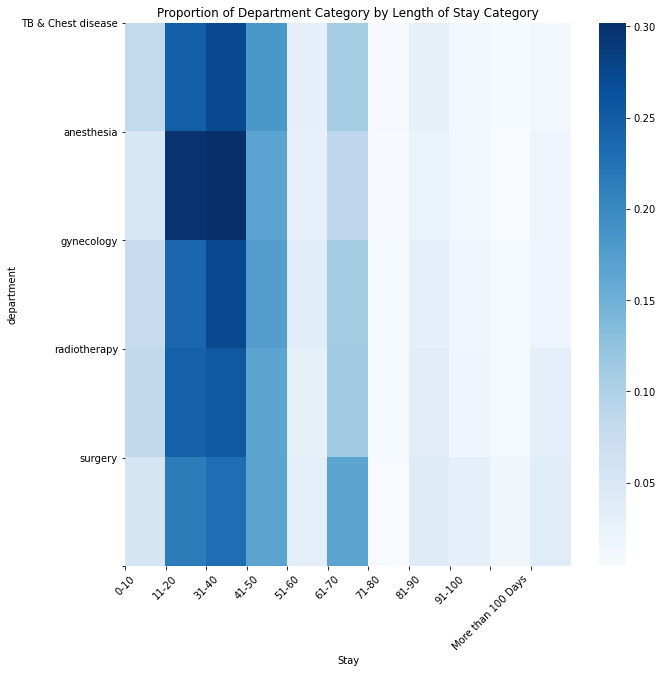

In [138]:
# create a heatmap of stay w.r.t department to check the correlation

%matplotlib inline
c = df_los_concat.groupby(["department", "stay"]).size()
c = (c/c.groupby(level=0).sum()).reset_index()
department_order = c.department.unique() 
c = c.values[:,-1].reshape(c.department.unique().size, c.stay.unique().size).astype(float)

plt.figure(figsize=(10,10))
sns.heatmap(c, cmap = "Blues")

stay_order = ['0-10', '11-20', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','91-100', 'More than 100 Days']

plt.title("Proportion of Department Category by Length of Stay Category")
plt.ylabel("department")
plt.xlabel("Stay")
plt.xticks(np.arange(0,11), stay_order, rotation = 45)
plt.yticks(np.arange(0,6), department_order, rotation = 0)


We do see a marginal difference in surgery department's distribution of cases, whereby it is slightly more skewed to more longer LOS than other departments. This could be confounded by lack of surgery entries. 

**Continued in Feature Engineering**: 

Maybe we could aggregate TB, anesthesia, gynecology and radiotherapy together into a super category and leave surgery as separate category.

#### ward_facility_code

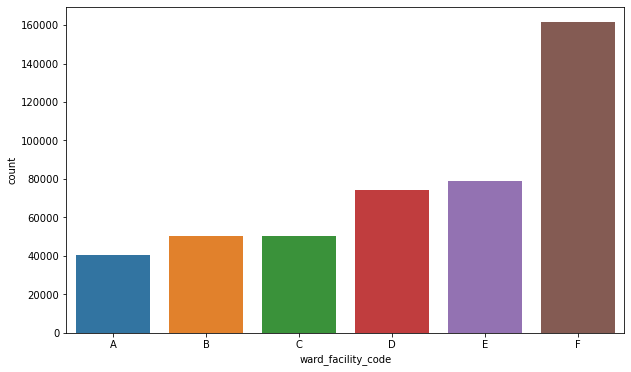

In [139]:
# frequency distribution plot for ward_facility_code

order = df_los_concat['ward_facility_code'].value_counts(ascending=True).index

plt.subplots(figsize=(10, 6))

sns.countplot(x="ward_facility_code", data=df_los_concat , order=order)

plt.show()

It can be inferred from above count plot that there are more Ward_Facility_Code 'F' and less Ward_Facility_Code 'A'

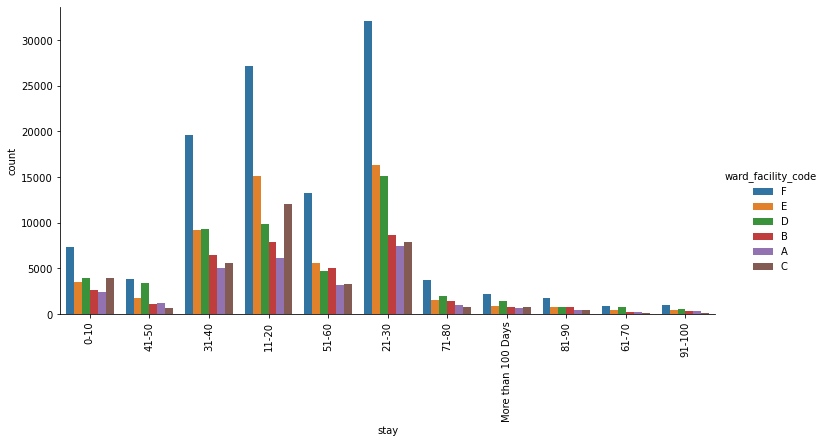

In [140]:
# ward_facility_code relationship with target - stay

sns.catplot(x='stay', hue="ward_facility_code", kind="count", data=df_los_concat, height=5, aspect=2)

plt.xticks(rotation=90);

From the above plot we conclude that the ward type facility is highest for duration stay of 21-30days comapred to other ward facilty codes.

#### severity of illness

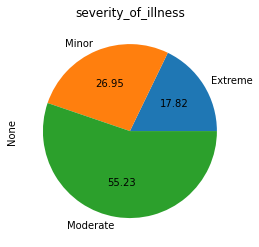

In [141]:
# pie chart for severity_of_illness

df_los_concat.groupby('severity_of_illness').size().plot(kind='pie', autopct='%.2f',title = "severity_of_illness") 

From the above plot, we see that most number of cases are moderate in nature of severity followed by minor and then, extremely severe.

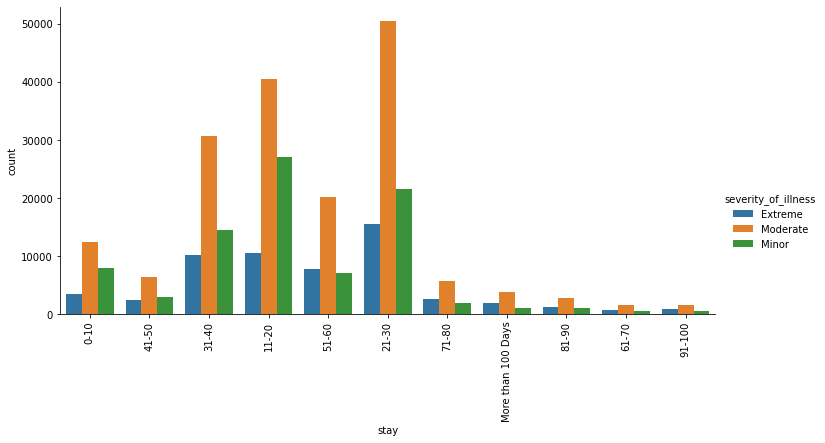

In [142]:
# severity of illness relationship with target - stay

sns.catplot(x='stay', hue="severity_of_illness", kind="count",data=df_los_concat, height=5, aspect=2)

plt.xticks(rotation=90);

From the above plot we conclude that the severity of illness plays a major impact on the duartion of stay of the patients, with major reason as moderate illness for an average of 21-30 days.

#### hospital type_code

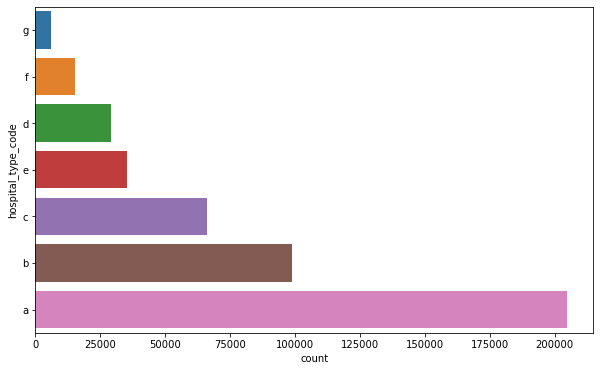

In [143]:
# frequency distribution plot for hospital_type_code

order = df_los_concat['hospital_type_code'].value_counts(ascending=True).index

plt.subplots(figsize=(10, 6))

sns.countplot(y="hospital_type_code", data=df_los_concat , order=order)

plt.show()

It can be inferred from above count plot that there are more hopsital type 'a' and less hospital type 'g'

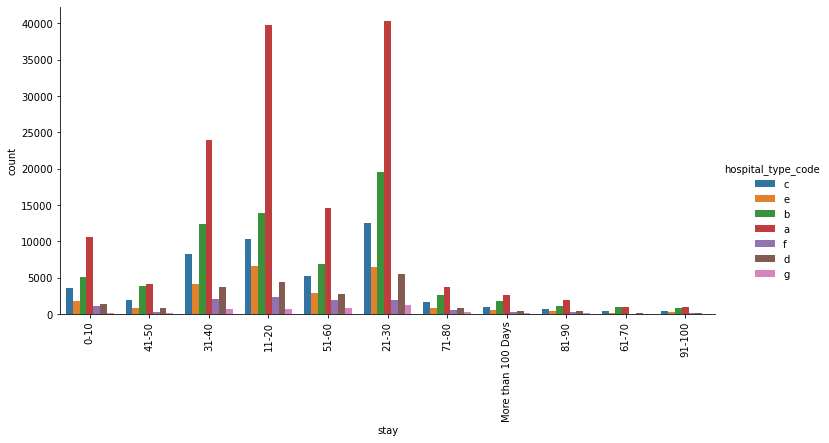

In [144]:
# hospital_type_code relationship with target - stay

sns.catplot(x='stay', hue="hospital_type_code", kind="count",data=df_los_concat, height=5, aspect=2)

plt.xticks(rotation=90);

From the above plot we conclude that the hospital type code 'a' has the highest number of patients staying comapred to others.

**Hospital_code & hospital_type_code**

In [145]:
# creating a groupby for hospital_type_code and hospital_code

df_los_concat.groupby(['hospital_type_code','hospital_code']).size()

hospital_type_code  hospital_code
a                   4                 1749
                    5                 7448
                    6                29218
                    7                 1870
                    12               16168
                    13                7430
                    14               24713
                    19               30035
                    23               38201
                    24               11466
                    27               20234
                    29               16158
b                   11               24821
                    20                1962
                    26               47498
                    28               24568
c                   2                 7276
                    3                10276
                    8                 5284
                    15               13324
                    16                5244
                    21               11783
                    

Creating a feature for Hospital_type_&_hospital_code because particular hospital_code corresponds to particular hospital_type_code

In [146]:
df_los_concat['hospital_code']= df_los_concat['hospital_code'].apply(lambda x: str(x))
df_los_concat['hospital_type_&_hospital_code']= df_los_concat['hospital_type_code']+'&'+df_los_concat['hospital_code']
df_los_concat['hospital_code']= df_los_concat['hospital_code'].apply(lambda x: int(x))
df_los_concat['hospital_type_&_hospital_code']

0          c&8
1          c&2
2         e&10
3         b&26
4         b&26
          ... 
137052    b&11
137053    e&25
137054    c&30
137055     a&5
137056     a&6
Name: hospital_type_&_hospital_code, Length: 455398, dtype: object

**Contined in Feature Engineering**:

Dropping hospital_type_code as it is explained by the new feature

#### stay

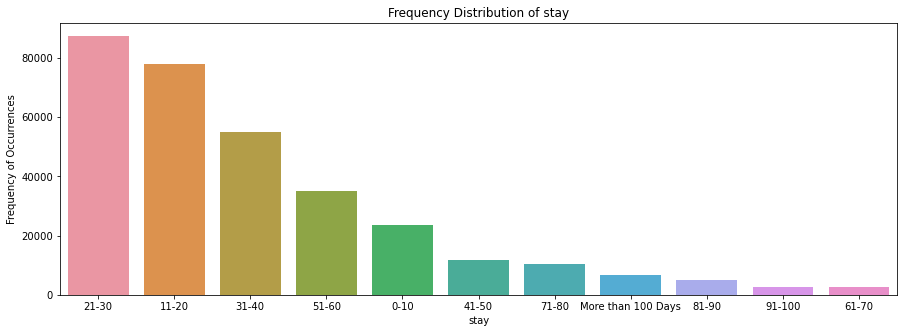

In [147]:
# frequency distribution plot for target variable stay

plt.figure(figsize=(15,5))

sns.barplot(df_los_concat['stay'].value_counts().index, df_los_cat['stay'].value_counts().values)

plt.title('Frequency Distribution of stay')

plt.ylabel('Frequency of Occurrences')

plt.xlabel('stay')

plt.show()

From the countplot above we can conclude that the highest duration of patients stay at the hospital is 21-30 days.

The data is biased towards low Length of stay Days. Hence, the predictions of the model would be dominated by them.

#### PatientID

**Top 25 patients**

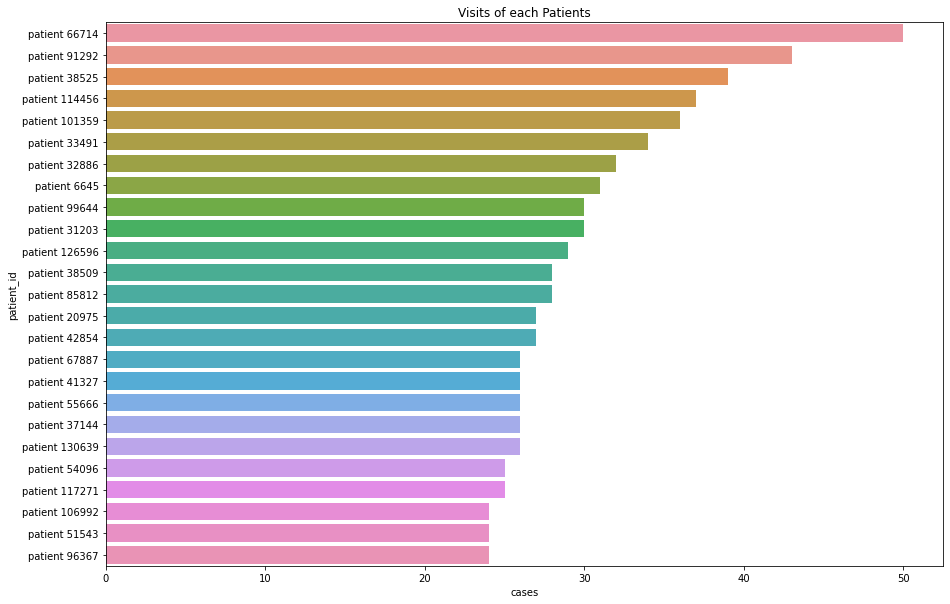

In [148]:
# frequency distribution plot for target variable stay

plt.figure(figsize=(15,10))

data = df_los_concat['patientid'].value_counts().reset_index()
data.columns = ['patientid', 'cases']
data['patientid'] = 'patient ' + data['patientid'].astype(str)
data = data.sort_values('cases', ascending = False)

sns.barplot(x = "cases", y= "patientid", data = data.head(25))

plt.title('Visits of each Patients')

plt.ylabel('patient_id')

plt.xlabel('cases')

plt.show()

## 4. Feature Engineering:

### 4.A. Updating data as per EDA

#### Concatenating Ward types as explained in EDA

In [149]:
# Concatenating Ward types as explained in EDA

df_los_concat.loc[:, "new_ward_type"] = df_los_concat.loc[:, "ward_type"].astype(str)
combine_cats = {"PQRU": ["P", "Q", "R", "U"], "ST": ["S", "T"]}

for i in combine_cats:
    index = df_los_concat[df_los_concat["ward_type"].isin(combine_cats[i])].index.values
    df_los_concat.at[index, "new_ward_type"] = i

In [150]:
# check the new column

df_los_concat["new_ward_type"]

0           ST
1           ST
2           ST
3         PQRU
4           ST
          ... 
137052      ST
137053    PQRU
137054    PQRU
137055    PQRU
137056    PQRU
Name: new_ward_type, Length: 455398, dtype: object

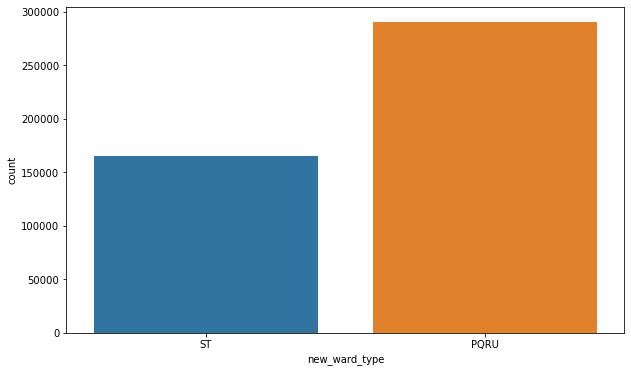

In [151]:
# frequency distribution plot for ward_type

order = df_los_concat['new_ward_type'].value_counts(ascending=True).index

plt.subplots(figsize=(10, 6))

sns.countplot(x="new_ward_type", data=df_los_concat , order=order)

plt.show()

#### Dropping columns

Columns to be dropped are:

1. patientid 
2. caseid    
3. ward_type_code
4. hospital_region_code
5. ward_facility_code

In [152]:
# dropping some columns 

column_to_be_dropped = ["patientid", "ward_type", "ward_facility_code", "hospital_region_code"]

df_los_concat.drop(column_to_be_dropped,axis=1,inplace=True)
df_los_concat.columns

Index(['case_id', 'hospital_code', 'hospital_type_code', 'city_code_hospital',
       'available_extra_rooms_in_hospital', 'department', 'bed_grade',
       'city_code_patient', 'type_of_admission', 'severity_of_illness',
       'visitors_with_patient', 'age', 'admission_deposit', 'stay',
       'train_or_test', 'hospital_region_&_ward_facility_code',
       'hospital_region_&_city_code_hospital', 'hospital_type_&_hospital_code',
       'new_ward_type'],
      dtype='object')

In [153]:
# check for the info for the new concatenated columns

df_los_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455398 entries, 0 to 137056
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   case_id                               455398 non-null  int64  
 1   hospital_code                         455398 non-null  int64  
 2   hospital_type_code                    455398 non-null  object 
 3   city_code_hospital                    455398 non-null  int64  
 4   available_extra_rooms_in_hospital     455398 non-null  int64  
 5   department                            455398 non-null  object 
 6   bed_grade                             455398 non-null  float64
 7   city_code_patient                     455398 non-null  float64
 8   type_of_admission                     455398 non-null  object 
 9   severity_of_illness                   455398 non-null  object 
 10  visitors_with_patient                 455398 non-null  int64  
 11  

### 4.B. Label Encoding

Since most of our data is nominal and we have a lot of categorical variables, we choose label encoding vs One hot encoding. 

In [154]:
categorical_col=[]
for col in df_los_concat.columns:
    if ((df_los_concat[col].dtype== object) and (df_los_concat[col].nunique()<=50) and (col != "stay" and col != "train_or_test")):
        categorical_col.append(col)
print(categorical_col)

['hospital_type_code', 'department', 'type_of_admission', 'severity_of_illness', 'age', 'hospital_region_&_ward_facility_code', 'hospital_region_&_city_code_hospital', 'hospital_type_&_hospital_code', 'new_ward_type']


In [155]:
# creating label encoding for categorical columns

le= LabelEncoder()
for col in categorical_col:
    df_los_concat[col]= le.fit_transform(df_los_concat[col])


In [156]:
df_los_concat

,case_id,hospital_code,hospital_type_code,city_code_hospital,available_extra_rooms_in_hospital,department,bed_grade,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay,train_or_test,hospital_region_&_ward_facility_code,hospital_region_&_city_code_hospital,hospital_type_&_hospital_code,new_ward_type
0,1,8,2,3,3,3,2.0,7.0,0,0,2,5,4911.0,0-10,train,6,9,23,1
1,2,2,2,5,2,3,2.0,7.0,1,0,2,5,5954.0,41-50,train,6,10,18,1
2,3,10,4,1,2,1,2.0,7.0,1,0,2,5,4745.0,31-40,train,0,0,27,1
3,4,26,1,2,2,3,2.0,7.0,1,0,2,5,7272.0,41-50,train,4,6,14,0
4,5,26,1,2,2,3,2.0,7.0,1,0,2,5,5558.0,41-50,train,4,6,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,1,2,4,1,3.0,3.0,0,1,4,4,6313.0,NaN,test,4,6,12,1
137053,455492,25,4,1,2,3,4.0,7.0,0,2,2,0,3510.0,NaN,test,0,0,29,0
137054,455493,30,2,3,2,1,4.0,12.0,2,1,2,0,7190.0,NaN,test,5,9,21,0
137055,455494,5,0,1,2,1,4.0,10.0,1,1,2,4,5435.0,NaN,test,0,0,9,0


### 4.C Standardisation of numerical Variables

We need to standardise the numerical variables as they have varied ranges.

In [157]:

numerical_col = ["available_extra_rooms_in_hospital", "visitors_with_patient", "admission_deposit"]

df_los_concat_scaled = df_los_concat.copy()

features = df_los_concat_scaled[numerical_col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

df_los_concat_scaled[numerical_col] = features
df_los_concat_scaled[numerical_col]

,available_extra_rooms_in_hospital,visitors_with_patient,admission_deposit
0,-0.168218,-0.733893,0.030933
1,-1.026655,-0.733893,0.992312
2,-1.026655,-0.733893,-0.122077
3,-1.026655,-0.733893,2.207170
4,-1.026655,-0.733893,0.627301
...,...,...,...
137052,0.690219,0.411623,1.323218
137053,-1.026655,-0.733893,-1.260430
137054,-1.026655,-0.733893,2.131587
137055,-1.026655,-0.733893,0.513927


### 4.D Labelling the Target array

In [158]:
# label the target variable

stay_map = {'21-30': 2,
 '11-20': 1,
 '31-40': 3,
 '51-60': 5,
 '0-10': 0,
 '41-50': 4,
 '71-80': 7,
 'More than 100 Days': 10,
 '81-90': 8,
 '91-100': 9,
 '61-70': 6}

df_los_concat_scaled['stay'] = df_los_concat_scaled['stay'].map(stay_map)
df_los_concat_scaled.stay.unique()

array([ 0.,  4.,  3.,  1.,  5.,  2.,  7., 10.,  8.,  6.,  9., nan])

the missing value is of test data which will be splitted next

### 4.E Splitting into Test and Train

In [159]:
# scaling the train and test datasets

df_los_train_final = df_los_concat_scaled.loc[df_los_concat_scaled.train_or_test.isin(['train'])]
df_los_test_final = df_los_concat_scaled.loc[df_los_concat_scaled.train_or_test.isin(['test'])]

df_los_train_final.drop(columns={'train_or_test', 'case_id'},axis=1,inplace=True)
df_los_test_final.drop(columns={'train_or_test', 'stay'},axis=1,inplace=True)

C:\Users\siddh\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [160]:
# check the shape of the final training dataset
print(df_los_train_final.shape)

# check the unique values for the target variable
print(df_los_train_final.stay.unique())

# check the top rows for the final training dataset
df_los_train_final.head()

(318383, 17)
[ 0.  4.  3.  1.  5.  2.  7. 10.  8.  6.  9.]


,hospital_code,hospital_type_code,city_code_hospital,available_extra_rooms_in_hospital,department,bed_grade,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay,hospital_region_&_ward_facility_code,hospital_region_&_city_code_hospital,hospital_type_&_hospital_code,new_ward_type
0,8,2,3,-0.168218,3,2.0,7.0,0,0,-0.733893,5,0.030933,0.0,6,9,23,1
1,2,2,5,-1.026655,3,2.0,7.0,1,0,-0.733893,5,0.992312,4.0,6,10,18,1
2,10,4,1,-1.026655,1,2.0,7.0,1,0,-0.733893,5,-0.122077,3.0,0,0,27,1
3,26,1,2,-1.026655,3,2.0,7.0,1,0,-0.733893,5,2.207170,4.0,4,6,14,0
4,26,1,2,-1.026655,3,2.0,7.0,1,0,-0.733893,5,0.627301,4.0,4,6,14,1


In [161]:
# check the shape of the final testing dataset
print(df_los_test_final.shape)

# check the top rows for the final testing dataset
df_los_test_final.head()

(137015, 17)


,case_id,hospital_code,hospital_type_code,city_code_hospital,available_extra_rooms_in_hospital,department,bed_grade,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,hospital_region_&_ward_facility_code,hospital_region_&_city_code_hospital,hospital_type_&_hospital_code,new_ward_type
0,318439,21,2,3,-0.168218,2,2.0,2.0,0,2,-0.733893,7,-1.642954,5,9,19,1
1,318440,29,0,4,-1.026655,2,2.0,2.0,1,2,0.411623,7,-0.792184,1,2,7,1
2,318441,26,1,2,-0.168218,2,4.0,2.0,0,2,-0.161135,7,-0.355278,4,6,14,1
3,318442,6,0,6,-0.168218,2,2.0,2.0,1,2,-0.161135,7,-0.649314,1,3,10,0
4,318443,28,1,11,-1.026655,2,2.0,2.0,1,2,0.411623,7,-0.660375,1,1,15,1


# 5. Modelling

We will use Random forest model for feature selection and compare the following models creeted by using those features:
1. Random forest classifier
2. Logistic Regression
3. Boosting: XGboost Classifier 
4. KNN

### 5.1 Random Forest Classifier - Feature selection and Hyperparameter tuning

STEPS:

1. Baseline Model

2. Hyperparameter tuning - Optimise the accuracy by carrying out hyperparameter tuning of random forest

3. Feature Selection: by Plotting the feature importance graph of the optimised model

4. Hyperparameter Tuning of features selected: Optimise the accuracy based on these features using hyperparameter tuning

**Baseline model**

**Creating feature matrix and Target array**

In [87]:
# create the feature matrix
X = df_los_train_final.drop(['stay'], axis = 1)

In [88]:
# create a target variable
y = df_los_train_final['stay']

In [89]:
# split the training data into train and validation data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=42)

In [90]:
# check the shape for the train and validation data
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((222868, 16), (95515, 16), (222868,), (95515,))

In [87]:
# for random forest classifier model
from sklearn.ensemble import RandomForestClassifier 

# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV    

**Modeling**

In [86]:
# create a model instance
model_random = RandomForestClassifier(random_state=0, n_jobs=-1)

In [87]:
# fit the model
model_random.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [88]:
model_random.score(X_train, y_train)

0.9996320692068847

In [89]:
# Predicting the validation set results
pred_random = model_random.predict(X_val)

In [90]:
# # create a confusion matrix for validation and predicted data
confusion_matrix(y_val,pred_random) 

array([[ 1337,  2872,  2277,   421,    49,   116,     2,    16,     1,
            2,     3],
       [ 1263, 10226,  8541,  2180,   185,   959,    22,    89,    22,
            8,    19],
       [  969,  7952, 13719,  2432,   328,   752,    45,    87,    31,
           18,    41],
       [  486,  3347,  5206,  4206,   198,  2657,    15,   194,    53,
           28,    67],
       [  158,   783,  1639,   550,    81,   251,    15,    24,    13,
            6,    29],
       [  160,  1097,  1433,  2492,    64,  4242,    26,   329,   205,
           47,   203],
       [   38,   136,   334,   141,    15,   121,    12,    19,     8,
            6,    29],
       [   53,   231,   353,   613,    21,  1174,     7,   269,    40,
           26,   194],
       [   11,    56,    86,   196,     5,   677,     2,    36,   255,
            2,   182],
       [   12,    57,    83,   172,     6,   333,     2,    36,    13,
           46,    91],
       [   33,    97,   130,   166,     3,   519,     3,   1

In [91]:
# # cheak the accuracy of validation data
accuracy = accuracy_score(y_val, pred_random)
accuracy

0.3692718421190389

Baseline model is overfiited. We will have to tune the model.

##### Hyperparameter tuning

In [139]:
# Hyperparameter Tuning
parameters = {'max_depth':[7,9,11,13,15,17,19,21],
              "min_samples_split":[10,25,50],
              "n_estimators":[400,500,600]}

In [140]:
# use gridsearchcv for finding optimal paramteres for hyper paramteres
tune_model = GridSearchCV(model_random,parameters,cv=5,scoring='accuracy', n_jobs=-1, verbose=1)

In [141]:
# fit the tune model
tune_model.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 46.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 103.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [7, 9, 11, 13, 15, 17, 19, 21],
                         'min_samples_split': [10, 25, 50],
                         'n_estimators': [400, 500, 600]},
             scoring='accuracy', verbose=1)

In [142]:
# find the best parameters for the tuned model
tune_model.best_params_

{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 600}

In [143]:
# check the score for train data
tune_model.score(X_train,y_train)

0.5268320261320603

##### Feature selection

In [160]:
model_random_optimised = RandomForestClassifier(max_depth=15,n_estimators=600,min_samples_split=10, random_state=0, n_jobs=-1, verbose=2)

In [161]:
model_random_optimised.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 600building tree 2 of 600
building tree 3 of 600

building tree 4 of 600
building tree 5 of 600building tree 6 of 600

building tree 7 of 600building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600building tree 12 of 600


building tree 13 of 600
building tree 14 of 600
building tree 15 of 600building tree 16 of 600

building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600building tree 23 of 600

building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s



building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600building tree 43 of 600

building tree 44 of 600
building tree 45 of 600
building tree 46 of 600
building tree 47 of 600
building tree 48 of 600
building tree 49 of 600
building tree 50 of 600
building tree 51 of 600
building tree 52 of 600
building tree 53 of 600
building tree 54 of 600building tree 55 of 600

building tree 56 of 600
building tree 57 of 600
building tree 58 of 600
building tree 59 of 600
building tree 60 of 600
building tree 61 of 600
building tree 62 of 600
building tree 63 of 600
building tree 64 of 600
building tree 65 of 600building tree 66 of 600

building tree 67 of 600
building tree 68 of 600
building tree 69 of 600
building tree 70 of 600building tree 71 of 600

building tree 72 of 600
building tree 73 of 600
building tree 74 of 600
building tree 75 of 600
building tree 76 of 600
building tree 77 of 600
building tree 7

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.9s


building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600
building tree 155 of 600
building tree 156 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600
building tree 166 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600
building tree 172 of 600
building tree 173 of 600
building tree 174 of 600
building tree 175 of 600
building tree 176 of 600
building tree 177 of 600
building tree 178 of 600
building tree 179 of 600
building tree 180 of 600
building tree 181 of 600
building tree 182 of 600
building tree 183 of 600
building tree 184 of 600
building tree 185 of 600
building tree 186 of 600
building tree 187 of 600
building tree 188 of 600
building tree 189 of 600


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   16.5s


building tree 353 of 600building tree 354 of 600

building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600building tree 366 of 600

building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600building tree 378 of 600

building tree 379 of 600
building tree 380 of 600
building tree 381 of 600
building tree 382 of 600
building tree 383 of 600
building tree 384 of 600
building tree 385 of 600
building tree 386 of 600
building tree 387 of 600
building tree 388 of 600
building tree 389 of 600
building tree 390 of 600
building tree 391 of 600
building tree 392 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   28.5s finished


RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=600,
                       n_jobs=-1, random_state=0, verbose=2)

In [162]:
# accuracy score for train data
model_random_optimised.score(X_train,y_train)   

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    4.6s finished


0.5268320261320603

In [163]:
# Important features used for spliting
model_random_optimised.feature_importances_      

array([0.04001672, 0.01385963, 0.02108606, 0.07444062, 0.03418458,
       0.05964996, 0.07685822, 0.04149499, 0.03377847, 0.27878233,
       0.06623142, 0.14815981, 0.01703172, 0.02012674, 0.04171917,
       0.03257955])

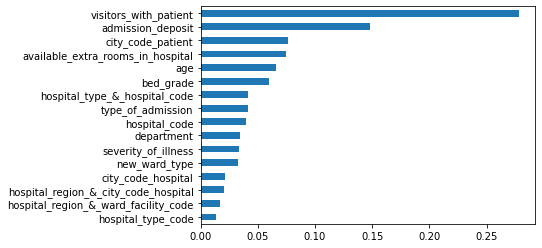

In [164]:
# # check for the feature importances graph
data = pd.Series(data=model_random_optimised.feature_importances_,index=X_train.columns)
data.sort_values(ascending=True,inplace=True)
data.plot.barh()

In [157]:
# predictions using tuned model
y_pred_test_cv=model_random_optimised.predict(X_val)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.6s finished


In [158]:
# create confusion matrix for validation 
confusion_matrix(y_val,y_pred_test_cv)

array([[  900,  3258,  2788,    93,     0,    57,     0,     0,     0,
            0,     0],
       [  403, 11659,  9396,  1248,     1,   802,     0,     0,     1,
            0,     4],
       [  310,  7704, 17178,   565,     0,   589,     0,     1,     8,
            0,    19],
       [  196,  3117,  6744,  3711,     0,  2629,     0,    11,     5,
            1,    43],
       [   93,   691,  2226,   227,     0,   280,     0,     1,     2,
            0,    29],
       [   71,   955,  1840,  2345,     0,  4871,     0,     5,    62,
            0,   149],
       [   19,   137,   443,    79,     0,   146,     0,     3,     7,
            0,    25],
       [   30,   206,   476,   534,     0,  1478,     0,    29,     7,
            1,   220],
       [   12,    55,    80,   156,     0,   943,     0,     2,   107,
            0,   153],
       [    9,    48,   121,   144,     0,   412,     0,     4,     6,
            0,   107],
       [   24,   101,   160,   139,     0,   730,     0,    

In [159]:
# check the accuracy score for the final model 
accuracy = accuracy_score(y_val,y_pred_test_cv) 
print('Random Forest accuracy: ', accuracy*100, '%')

Random Forest accuracy:  41.121289849761816 %


Features to be chosen are top 6:
1. "visitors_with_patient"
2. "admission_deposit"
3. "city_code_patient"
4. "available_extra_rooms_in_hospital"
5. "age"
6. "bed_grade"

###### Creating Feature matrix and Target array

In [162]:
# create the feature matrix
X = df_los_train_final[["visitors_with_patient","admission_deposit","city_code_patient","available_extra_rooms_in_hospital","age","bed_grade"]]

In [163]:
# create a target variable
y = df_los_train_final['stay']

In [164]:
# split the training data into train and validation data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=42)
# check the shape for the train and validation data
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((222868, 6), (95515, 6), (222868,), (95515,))

##### Hyperparameter tuning on the features selected

In [180]:
model_random = RandomForestClassifier(random_state=0, n_jobs=-1)

In [181]:
# Hyperparameter Tuning
parameters = {'max_depth':[13,14,15,17],
              "min_samples_split":[10,25],
              "n_estimators":[400,500,600]}

In [182]:
# use gridsearchcv for finding optimal paramteres for hyper paramteres
tune_model = GridSearchCV(model_random,parameters,cv=5,scoring='accuracy', n_jobs=-1, verbose=1)

In [183]:
# fit the tune model
tune_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 21.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [7, 9, 11, 13],
                         'min_samples_split': [10, 25],
                         'n_estimators': [400, 500, 600]},
             scoring='accuracy', verbose=1)

In [184]:
# find the best parameters for the tuned model
tune_model.best_params_

{'max_depth': 13, 'min_samples_split': 25, 'n_estimators': 600}

In [185]:
# check the score for train data
tune_model.score(X_train,y_train)

0.4115709747473841

**optimised model**

In [192]:
model_random_optimised = RandomForestClassifier(max_depth=15,n_estimators=600,min_samples_split=25, random_state=0, n_jobs=-1, verbose=2)

In [193]:
model_random_optimised.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 600building tree 2 of 600

building tree 3 of 600
building tree 4 of 600
building tree 5 of 600building tree 6 of 600

building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600building tree 11 of 600building tree 12 of 600


building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600building tree 22 of 600
building tree 23 of 600

building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600building tree 28 of 600
building tree 29 of 600
building tree 30 of 600building tree 31 of 600


building tree 32 of 600building tree 33 of 600building tree 34 of 600

building tree 35 of 600

building tree 36 of 600


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s


building tree 37 of 600building tree 38 of 600

building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600building tree 43 of 600
building tree 44 of 600

building tree 45 of 600building tree 46 of 600
building tree 47 of 600

building tree 48 of 600
building tree 49 of 600
building tree 50 of 600
building tree 51 of 600
building tree 52 of 600
building tree 53 of 600
building tree 54 of 600
building tree 55 of 600building tree 56 of 600

building tree 57 of 600
building tree 58 of 600building tree 59 of 600

building tree 60 of 600
building tree 61 of 600
building tree 62 of 600
building tree 63 of 600building tree 64 of 600

building tree 65 of 600
building tree 66 of 600
building tree 67 of 600building tree 68 of 600building tree 69 of 600


building tree 70 of 600
building tree 71 of 600
building tree 72 of 600
building tree 73 of 600
building tree 74 of 600building tree 75 of 600

building tree 76 of 600building tree 77 of 600

building tree 78

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.7s


building tree 151 of 600building tree 152 of 600

building tree 153 of 600building tree 154 of 600

building tree 155 of 600
building tree 156 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600building tree 164 of 600

building tree 165 of 600
building tree 166 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600
building tree 172 of 600
building tree 173 of 600
building tree 174 of 600
building tree 175 of 600
building tree 176 of 600
building tree 177 of 600
building tree 178 of 600
building tree 179 of 600
building tree 180 of 600
building tree 181 of 600
building tree 182 of 600
building tree 183 of 600
building tree 184 of 600
building tree 185 of 600
building tree 186 of 600
building tree 187 of 600
building tree 188 of 600building tree 189 of 600

building tree 190 of 600


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   11.0s


building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600building tree 362 of 600

building tree 363 of 600building tree 364 of 600

building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600building tree 370 of 600building tree 371 of 600
building tree 372 of 600


building tree 373 of 600building tree 374 of 600

building tree 375 of 600building tree 376 of 600

building tree 377 of 600
building tree 378 of 600
building tree 379 of 600
building tree 380 of 600building tree 381 of 600
building tree 382 of 600

building tree 383 of 600
building tree 384 of 600building tree 385 of 600
building tree 386 of 600
building tree 387 of 600
building tree 388 of 600

building tree 389 of 600
building tree 390 of 600
building tree 391 of 600
building tree 392 of 600building tree 393 of 600

building tree 394 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   19.5s finished


RandomForestClassifier(max_depth=15, min_samples_split=25, n_estimators=600,
                       n_jobs=-1, random_state=0, verbose=2)

In [194]:
# accuracy score for train data
model_random_optimised.score(X_train,y_train)   

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    4.1s finished


0.4361236247464867

In [195]:
# predictions using tuned model
y_pred_test_cv=model_random_optimised.predict(X_val)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    1.9s finished


In [196]:
# create confusion matrix for validation 
confusion_matrix(y_val,y_pred_test_cv)

array([[  513,  2880,  3344,   233,     0,   126,     0,     0,     0,
            0,     0],
       [  316, 10482, 10215,  1350,     0,  1144,     0,     0,     0,
            0,     7],
       [  308,  8303, 16029,   805,     0,   890,     0,     0,     4,
            0,    35],
       [  228,  3736,  6126,  3238,     0,  3037,     0,     7,     4,
            2,    79],
       [   94,   970,  1892,   244,     0,   312,     0,     2,     0,
            0,    35],
       [  112,  1211,  1811,  2355,     0,  4549,     0,    15,    25,
            0,   220],
       [   30,   178,   389,    79,     0,   152,     0,     3,     1,
            0,    27],
       [   35,   296,   433,   671,     0,  1290,     0,    22,     5,
            0,   229],
       [   18,    64,    69,   171,     0,   980,     0,     3,    26,
            0,   177],
       [   10,    79,   117,   181,     0,   352,     0,     4,     3,
            3,   102],
       [   35,   116,   138,   170,     0,   755,     0,    

In [197]:
# check the accuracy score for the final model 
accuracy = accuracy_score(y_val,y_pred_test_cv) 
print('Random Forest accuracy: ', accuracy*100, '%')

Random Forest accuracy:  37.313510966863845 %


### 5.2 Logistics Regression model

In [84]:
 # for building logistics model
from sklearn.linear_model import LogisticRegression

In [85]:
# create a model instance
model_log = LogisticRegression()  

In [86]:
# fit the model
model_log.fit(X_train,y_train)

LogisticRegression()

In [87]:
# Accuracy score for train
model_log.score(X_train,y_train)  

0.3602984726385125

In [88]:
# make predictions on the X_validation data
pred_log = model_log.predict(X_val)

In [89]:
# Classification report 
print (classification_report(y_val, pred_log))

              precision    recall  f1-score   support

         0.0       0.32      0.00      0.00      7096
         1.0       0.36      0.37      0.36     23514
         2.0       0.38      0.67      0.49     26374
         3.0       0.31      0.22      0.26     16457
         4.0       0.00      0.00      0.00      3549
         5.0       0.33      0.37      0.35     10298
         6.0       0.00      0.00      0.00       859
         7.0       0.00      0.00      0.00      2981
         8.0       0.00      0.00      0.00      1508
         9.0       0.00      0.00      0.00       851
        10.0       0.52      0.29      0.38      2028

    accuracy                           0.36     95515
   macro avg       0.20      0.18      0.17     95515
weighted avg       0.32      0.36      0.31     95515



In [90]:
# create confusion matrix for the y_val and predicted data
conf_mat = confusion_matrix(y_val, pred_log)
conf_mat

array([[    8,  2702,  4079,   248,     0,    59,     0,     0,     0,
            0,     0],
       [    7,  8769, 12290,  1641,     0,   807,     0,     0,     0,
            0,     0],
       [    5,  6977, 17717,  1110,     0,   543,     0,     0,     0,
            0,    22],
       [    1,  3396,  6901,  3611,     0,  2512,     0,     0,     0,
            0,    36],
       [    1,   890,  2072,   319,     0,   241,     0,     0,     0,
            0,    26],
       [    0,  1155,  2189,  3061,     0,  3777,     0,     0,     0,
            0,   116],
       [    1,   178,   418,    97,     0,   149,     0,     0,     0,
            0,    16],
       [    1,   283,   562,   881,     0,  1122,     0,     0,     0,
            0,   132],
       [    0,    55,   101,   172,     0,  1079,     0,     0,     0,
            0,   101],
       [    0,    71,   156,   228,     0,   304,     0,     0,     0,
            0,    92],
       [    1,   122,   172,   220,     0,   917,     0,    

In [91]:
# check the accuarcy score on the predicted data
accuracy = accuracy_score(y_val, pred_log)
print('Logistics_accuracy: ', accuracy*100, '%')

Logistics_accuracy:  36.096948123331416 %


### 5.3 Boosting : XgBoost Classifier

In [92]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Divit\anaconda3\python.exe -m pip install --upgrade pip' command.


**Baseline model**

In [93]:
# for building xgboost model
from xgboost import XGBClassifier

In [96]:
# create an instance of the model
xgb_model = XGBClassifier(max_depth = 15, learning_rate=0.1, n_estimators=600, gamma=0, min_child_weight=3, objective="multi:softmax",n_jobs=-1, verbose=1,seed=80)

In [97]:
#  fit the model on training data
xgb_model.fit(X_train,y_train)

[16:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:32:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=80, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=80, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)

In [101]:
xgb_model.score(X_train,y_train)

0.9425713875477861

In [98]:
# make predictions on validation data
pred_xgb = xgb_model.predict(X_val)

In [99]:
# Making the Confusion Matrix 
conf_mat = confusion_matrix(y_val, pred_xgb)
conf_mat

array([[ 1304,  2981,  2312,   341,    40,    94,     4,    15,     0,
            0,     5],
       [ 1052, 10656,  8902,  1831,    78,   892,     6,    67,    14,
            1,    15],
       [  789,  7435, 15493,  1761,   135,   623,     7,    55,    37,
           11,    28],
       [  398,  3029,  5888,  4157,   112,  2575,     7,   169,    60,
           16,    46],
       [  120,   695,  1883,   508,    45,   233,     3,    19,     9,
            8,    26],
       [  126,   944,  1583,  2607,    49,  4229,     4,   326,   226,
           32,   172],
       [   29,   128,   378,   130,    11,   126,     8,    14,     8,
            3,    24],
       [   42,   203,   359,   666,    15,  1198,     5,   248,    55,
           19,   171],
       [   15,    53,    88,   207,     6,   629,     6,    52,   276,
            5,   171],
       [   10,    53,    83,   181,     8,   326,     1,    53,    21,
           32,    83],
       [   28,    78,   138,   183,     4,   500,     4,   1

In [110]:
# check accuracy score for validation data
accuracy = accuracy_score(y_val, pred_xgb)
print('XGBoost accuracy: ', accuracy*100, '%')

XGBoost accuracy:  38.98759357169031 %


Model is overfitted and we tried for hyperparameter tuning but it was taking a lot of time

In [218]:
# # Hyperparameter Tuning
# param={'max_depth' : [12,13,14,15],
#        'learning_rate':[0.1,0.01],
#       "n_estimators":[500,600],
#       "gamma": [0,0.1],
# #       "min_child_weight":[1,3,5]}

In [220]:
# # tuning max_depth and learning_rate
# tune_model = GridSearchCV(xgb_model,param,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)

In [ ]:
# # fit the tune model
# tune_model.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 105.0min


In [ ]:
# # find the best parameters for the tuned model
# tune_model.best_params_

In [ ]:
# # predictions using tuned model
# y_pred_xgb_cv = tune_model.predict(X_val)

In [ ]:
# # create confusion matrix for validation 
# confusion_matrix(y_val,y_pred_xgb_cv)

In [ ]:
# # check accuracy score for validation data
# accuracy = accuracy_score(y_val, y_pred_xgb_cv)
# print('XGBoost accuracy: ', accuracy*100, '%')

### 5.4 KNN

In [175]:
# for building the KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [166]:
# create an instance for the model
KNN = KNeighborsClassifier(n_neighbors = 12)

In [167]:
# fit the model
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [168]:
KNN.score(X_train, y_train)

0.43623579876877794

In [169]:
# make predictions on the model
pred_knn = KNN.predict(X_val)

In [170]:
# Making the Confusion Matrix 
conf_mat = confusion_matrix(y_val, pred_knn)
conf_mat

array([[  629,  3073,  2784,   445,     4,   150,     1,     9,     0,
            0,     1],
       [  929, 10368,  9363,  1874,    23,   890,     0,    46,    12,
            0,     9],
       [  920,  9906, 13116,  1654,    24,   691,     0,    27,    16,
            0,    20],
       [  482,  4810,  5286,  3331,    15,  2307,     0,   104,    54,
            1,    67],
       [  134,  1177,  1571,   387,     5,   230,     1,     9,     7,
            5,    23],
       [  218,  1901,  1729,  2737,     8,  3267,     1,   156,   121,
            4,   156],
       [   34,   239,   329,   106,     1,   119,     0,     4,     8,
            2,    17],
       [   86,   496,   422,   760,     0,   935,     0,    99,    38,
            3,   142],
       [   16,   101,    82,   339,     0,   700,     1,    41,   101,
            3,   124],
       [   14,   117,   127,   225,     0,   252,     0,    26,    14,
            3,    73],
       [   25,   175,   148,   277,     3,   620,     0,   1

In [171]:
# check the accuracy score of the model on the validation data
accuracy = accuracy_score(y_val, pred_knn)
print('KNN accuracy: ', accuracy*100, '%')

KNN accuracy:  32.98120714023975 %


In [173]:
# Use cross validation for selecting optimum value of 'k'
parameter = {'n_neighbors':[12,14,16,18,20]}

In [176]:
knn_tune = GridSearchCV(KNN, parameter, cv=5)

In [177]:
knn_tune.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=12),
             param_grid={'n_neighbors': [12, 14, 16, 18, 20]})

In [178]:
knn_tune.best_params_

{'n_neighbors': 20}

In [179]:
knn_tune.best_score_

0.3435665943070813

In [180]:
y_pred_tune = knn_tune.predict(X_val)
y_pred_tune

array([3., 1., 1., ..., 1., 1., 2.])

In [181]:
confusion_matrix(y_val, y_pred_tune)

array([[  410,  3142,  3031,   380,     4,   128,     0,     1,     0,
            0,     0],
       [  498, 10367, 10091,  1601,     4,   916,     0,    28,     4,
            0,     5],
       [  483,  9398, 14456,  1291,     2,   698,     0,    14,    12,
            0,    20],
       [  276,  4564,  5774,  3220,     4,  2475,     0,    61,    30,
            0,    53],
       [   83,  1135,  1734,   313,     2,   245,     0,     8,     3,
            4,    22],
       [  127,  1775,  1864,  2671,     3,  3531,     0,    81,    85,
            1,   160],
       [   19,   236,   347,   105,     0,   128,     0,     3,     3,
            0,    18],
       [   53,   437,   481,   731,     1,  1036,     0,    61,    23,
            0,   158],
       [   17,    90,    84,   321,     0,   783,     0,    23,    60,
            1,   129],
       [   10,   117,   128,   227,     0,   264,     0,    10,     9,
            1,    85],
       [   25,   148,   165,   265,     1,   657,     0,    

In [182]:
accuracy_score(y_val, y_pred_tune)

0.34268962990106266

## SVC

### Implementing One-Versus-Rest Classifier

In [ ]:
from sklearn.svm import SVC
import sklearn.model_selection as model_selection

In [ ]:
ovr_svc = SVC(kernel='linear', decision_function_shape='ovr',n_jobs=-1)

In [ ]:
ovr_svc.fit(X_train, y_train)

In [ ]:
ovr_svc.score(X_train,y_train)

In [ ]:
pred_ovr = ovr_svc.predict(X_val)

In [ ]:
confusion_matrix(y_val, pred_ovr)

In [ ]:
accuracy_score(y_val,pred_ovr)

### Implementing One-Versus-One Clasifier

In [ ]:
ovo_svc = SVC(kernel='linear', decision_function_shape='ovo',n_jobs=-1)

In [ ]:
ovo_svc.fit(X_train, y_train)

In [ ]:
ovo_svc.score(X_train,y_train)

In [ ]:
pred_ovo = ovo_svc.predict(X_test)

In [ ]:
confusion_matrix(y_test, pred_ovo)

In [ ]:
accuracy_score(y_test, pred_ovo)

# Results and Model Selection

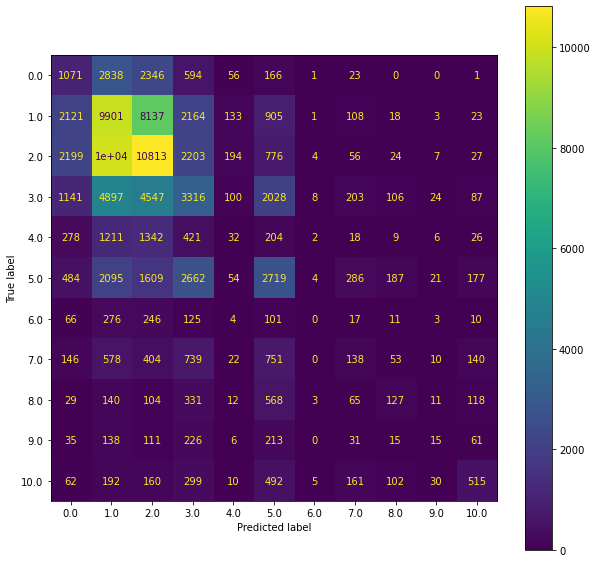

<Figure size 432x288 with 0 Axes>

In [113]:
fig, ax = plt.subplots(figsize=(10, 10))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(KNN,X_val,y_val,ax=ax)

In [172]:
# Comparing the accuracy score of all the 4 models 

data = [['Random Forest accuracy',  37.313],['Logistics_accuracy', 36.67],['XGBoost accuracy', 38.987],['KNN accuracy' ,32.98]]
comp_accuracy = pd.DataFrame(data,columns=['Model','Accuracy %'])
print(comp_accuracy)

                    Model  Accuracy %
0  Random Forest accuracy      37.313
1      Logistics_accuracy      36.670
2        XGBoost accuracy      38.987
3            KNN accuracy      32.980


As we can see,   seems to have done well at classifying the results better than the other algorithms.

We shall use this for our test dataset.

In [94]:
df_los_test_final

,case_id,hospital_code,hospital_type_code,city_code_hospital,available_extra_rooms_in_hospital,department,bed_grade,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,hospital_region_&_ward_facility_code,hospital_region_&_city_code_hospital,hospital_type_&_hospital_code,new_ward_type
0,318439,21,2,3,-0.168218,2,2.0,2.0,0,2,-0.733893,7,-1.642954,5,9,19,1
1,318440,29,0,4,-1.026655,2,2.0,2.0,1,2,0.411623,7,-0.792184,1,2,7,1
2,318441,26,1,2,-0.168218,2,4.0,2.0,0,2,-0.161135,7,-0.355278,4,6,14,1
3,318442,6,0,6,-0.168218,2,2.0,2.0,1,2,-0.161135,7,-0.649314,1,3,10,0
4,318443,28,1,11,-1.026655,2,2.0,2.0,1,2,0.411623,7,-0.660375,1,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,1,2,0.690219,1,3.0,3.0,0,1,0.411623,4,1.323218,4,6,12,1
137053,455492,25,4,1,-1.026655,3,4.0,7.0,0,2,-0.733893,0,-1.260430,0,0,29,0
137054,455493,30,2,3,-1.026655,1,4.0,12.0,2,1,-0.733893,0,2.131587,5,9,21,0
137055,455494,5,0,1,-1.026655,1,4.0,10.0,1,1,-0.733893,4,0.513927,0,0,9,0


In [127]:
# Fit the model into the whole data train
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [105]:
y_pred = KNN.predict(df_los_test_final)


submission = pd.DataFrame()
submission['case_id'] = df_los_test_final['case_id']
submission['Stay'] = y_pred

stay_decode = { 1 : '0-10', 2 : '11-20', 3 : '21-30', 4 : '31-40', 5 : '41-50', 6 : '51-60', 7 : '61-70'
            ,8 : '71-80', 9 : '81-90', 10 : '91-100', 11 : 'More than 100 Days'}

submission['Stay'] = submission['Stay'].map(stay_decode)
submission

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


# Model Deployement

In [106]:
import pickle

In [107]:
pickle.dump(KNN, open('model_final.pkl','wb'))

In [108]:
df_los_test_final.head()

,case_id,hospital_code,hospital_type_code,city_code_hospital,available_extra_rooms_in_hospital,department,bed_grade,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,hospital_region_&_ward_facility_code,hospital_region_&_city_code_hospital,hospital_type_&_hospital_code,new_ward_type
0,318439,21,2,3,-0.168218,2,2.0,2.0,0,2,-0.733893,7,-1.642954,5,9,19,1
1,318440,29,0,4,-1.026655,2,2.0,2.0,1,2,0.411623,7,-0.792184,1,2,7,1
2,318441,26,1,2,-0.168218,2,4.0,2.0,0,2,-0.161135,7,-0.355278,4,6,14,1
3,318442,6,0,6,-0.168218,2,2.0,2.0,1,2,-0.161135,7,-0.649314,1,3,10,0
4,318443,28,1,11,-1.026655,2,2.0,2.0,1,2,0.411623,7,-0.660375,1,1,15,1


In [ ]:
X_test.columns

In [ ]:
y_test.head()

In [ ]:
model = pickle.load(open('model_final.pkl','rb'))

In [ ]:
print(model.predict([[10000, 580, 5, 500000, 1500, 15, 5, 0, 10000]]))

# Conclusion

Using the train data, about  % of the cases could be correctly classified using the model.




